# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Kush Agarwal
2. Hari Sudhan

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

## Exploratory Data Analysis

### Data

We have been provided with the **Private Data** of Lending Club.


We also have a data dictionary which describes the meaning of these variables.

### Assumption: 
<br>The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

## Exploratory Data Analysis

Let's start with importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the loan data file.

In [2]:
loan = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

---
#  Data Cleaning

---

Missing values per column expressed as % of total number of values

In [5]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns in the data with 100% missing values. Lets remove all the columns with more than 50% missing values.

In [6]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

Removing columns with missing values as these columns clearly add noise and wont help in analysis.

In [7]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

Missing value analysis

In [8]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

let's remove the desc column as an equivalent short and consise information is present in the purpose and title column of the data.

In [9]:
loan = loan.drop('desc',axis=1)

In [10]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


From above we see that the columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly **Categorical** with values belonging to a range.

Let's take a look at all the different values of these Categorical columns

In [11]:
# Print unique values of each column nicely
print("Unique values of 'emp_length':", loan['emp_length'].unique())
print("Unique values of 'collections_12_mths_ex_med':", loan['collections_12_mths_ex_med'].unique())
print("Unique values of 'chargeoff_within_12_mths':", loan['chargeoff_within_12_mths'].unique())
print("Unique values of 'pub_rec_bankruptcies':", loan['pub_rec_bankruptcies'].unique())
print("Unique values of 'tax_liens':", loan['tax_liens'].unique())

Unique values of 'emp_length': ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
Unique values of 'collections_12_mths_ex_med': [ 0. nan]
Unique values of 'chargeoff_within_12_mths': [ 0. nan]
Unique values of 'pub_rec_bankruptcies': [ 0.  1.  2. nan]
Unique values of 'tax_liens': [ 0. nan]


The columns collections_12_mths_ex_med, chargeoff_within_12_mths, and tax_liens predominantly contain values of either 0 or NaN (representing no entry or blank). The range of values within these categorical columns doesn't appear to significantly impact the analysis. Therefore, we may opt to drop these columns from our analysis.

In [12]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [13]:
loan.shape

(39717, 50)


Moving on, let's examine the categorical column pub_rec_bankruptcies, which exhibits a 1.76% missing data rate. This column provides insights into the historical count of public record bankruptcies for each borrower.

In [14]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


The column pub_rec_bankruptcies contains values such as [0, 1, 2]. There are nearly 35,000 records with no bankruptcy cases, approximately 1,500 records with one bankruptcy case, and only 7 records with two bankruptcy cases. Although we could have used the mode representation of the data, which is 0 bankruptcies, to impute the missing values, we choose to remove the corresponding rows instead. This decision ensures that we avoid introducing any bias into the data.

In [15]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [16]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64


Following that, the columns emp_title and emp_length exhibit missing values of 6.19% and 2.71% respectively. These columns contain pertinent details about the customer or borrower, including their job title and length of employment in years. We will proceed by eliminating the rows containing NaN or blank values for these variables.

In [17]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [104]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
<br> title gives the title of the loan specified by the borrower in the application.
<br> revol_util gives the revolving line utelization and
<br> last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [21]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [19]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [22]:
loan.shape

(36433, 50)

Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [26]:
loan.to_csv('clean_dataset.csv', encoding='utf-8', index=False)

#### Further shortlist and narrow down the columns for analysis

Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense  for the analysis.

In [27]:
# clean_dataset = loan[:]#
clean_dataset = pd.read_csv('clean_dataset.csv',encoding='utf-8')

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077430    1314167       2500         2500           2500.0   
1      1076863    1277178      10000        10000          10000.0   
2      1075358    1311748       3000         3000           3000.0   
3      1075269    1311441       5000         5000           5000.0   
4      1069639    1304742       7000         7000           7000.0   
...        ...        ...        ...          ...              ...   
36428   158706     158450      12375        12375           1000.0   
36429   154154     151536       4800         4800           1100.0   
36430   132892     132889       9000         9000            700.0   
36431   119043     119040      15450        15450            600.0   
36432   112496     112493       3000         3000            525.0   

             term int_rate  installment grade sub_grade  ... recoveries  \
0       60 months   15.27%        59.83     C        C4  ...     117.08   
1       36 months   13.49%       339.31     C        C1  ...       0.00   
2       60 months   12.69%        67.79     B        B5  ...       0.00   
3       36 months    7.90%       156.46     A        A4  ...       0.00   
4       60 months   15.96%       170.08     C        C5  ...       0.00   
...           ...      ...          ...   ...       ...  ...        ...   
36428   36 months   10.91%       404.62     C        C3  ...       0.00   
36429   36 months   10.28%       155.52     C        C1  ...       0.00   
36430   36 months   12.49%       301.04     D        D3  ...    1909.87   
36431   36 months   11.22%       507.46     C        C4  ...     304.20   
36432   36 months   11.86%        99.44     D        D1  ...       0.00   

      collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0                        1.11       Apr-13           119.66   
1                        0.00       Jan-15           357.48   
2                        0.00       May-16            67.79   
3                        0.00       Jan-15           161.03   
4                        0.00       May-16          1313.76   
...                       ...          ...              ...   
36428                    0.00       Feb-10          4259.11   
36429                    0.00       Aug-08          3891.08   
36430                  668.36       May-08           301.05   
36431                    3.09       Oct-09          1016.15   
36432                    0.00       Aug-10           101.51   

      last_credit_pull_d policy_code application_type acc_now_delinq  \
0                 Sep-13           1       INDIVIDUAL              0   
1                 Apr-16           1       INDIVIDUAL              0   
2                 May-16           1       INDIVIDUAL              0   
3                 Jan-16           1       INDIVIDUAL              0   
4                 May-16           1       INDIVIDUAL              0   
...                  ...         ...              ...            ...   
36428             May-14           1       INDIVIDUAL              0   
36429             Aug-08           1       INDIVIDUAL              0   
36430             May-16           1       INDIVIDUAL              0   
36431             Mar-10           1       INDIVIDUAL              0   
36432             Jul-10           1       INDIVIDUAL              0   

      delinq_amnt pub_rec_bankruptcies  
0               0                  0.0  
1               0                  0.0  
2               0                  0.0  
3               0                  0.0  
4               0                  0.0  
...           ...                  ...  
36428           0                  1.0  
36429           0                  1.0  
36430           0                  1.0  
36431           0                  1.0  
36432           0                  1.0  

[36433 rows x 50 columns]

In [28]:
clean_dataset.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
<br> Let's use this file to get a better understanding of the 50 columns we are left with.
<br> This will help to further narrow down on the columns.

Here are some columns that can be removed from the analysis as they do not significantly contribute to predicting loan defaults:

1. **id**: Random number assigned to the loan, not relevant for analysis.
2. **member_id**: Random number assigned to the member, not relevant for analysis.
3. **pymnt_plan**: Value for the entire dataset is 'n', can be removed.
4. **url**: URL for LC page corresponding to each member id, not related to loan default.
5. **zip_code**: Only first 3 digits of the 5-digit zip code are visible, redundant with addr_state, not contributing to analysis.
6. **initial_list_status**: Value for the entire dataset is 'f', can be removed.
7. **policy_code**: Value for the entire dataset is '1', indicating all are publicly available, not relevant for analysis.
8. **application_type**: Value for the entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, not relevant for analysis.
9. **acc_now_delinq**: Value for the entire dataset is '0', can be removed.
10. **delinq_amnt**: Value for the entire dataset is '0', can be removed.
11. **funded_amnt**: Almost equivalent to loan_amnt, removing to avoid multicollinearity.
12. **funded_amnt_inv**: Almost equivalent to funded_amnt, removing to avoid multicollinearity. Also not available at the time of decision making for funding a loan.


Dropping the above columns from the clean_dataset dataframe.

In [29]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_dataset= clean_dataset.drop(columns_tobe_dropped,axis=1)

In [30]:
clean_dataset.shape

(36433, 38)

Columns for analysis reduced to 38 columns.

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.<br>
These columns are:
1. total_pymnt
2. total_rec_late_fee
3. collection_recovery_fee

In [31]:
clean_dataset.total_pymnt.value_counts().tail()

total_pymnt
5661.170000     1
40297.372600    1
9536.544293     1
4577.397548     1
3579.662273     1
Name: count, dtype: int64

In [33]:
clean_dataset.total_rec_late_fee.value_counts().tail()

total_rec_late_fee
30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: count, dtype: int64

In [34]:
clean_dataset.collection_recovery_fee.value_counts().tail()

collection_recovery_fee
2.9400      1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: count, dtype: int64

In [35]:
clean_dataset.total_pymnt= round(clean_dataset.total_pymnt,2)
clean_dataset.total_rec_late_fee= round(clean_dataset.total_rec_late_fee,2)
clean_dataset.collection_recovery_fee= round(clean_dataset.collection_recovery_fee,2)

Next, there are several columns in the dataframe that contain date or month information but are currently stored as object data type. Converting these columns to datetime type will enhance their usability for analysis purposes. The columns to be converted are:

1. **issue_d**: Denotes the date when the loan was issued.
2. **earliest_cr_line**: Represents the date of the earliest credit line opened by the borrower.
3. **last_pymnt_d**: Indicates the date of the last payment received.
4. **last_credit_pull_d**: Indicates the date when the last credit report was pulled.


In [36]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_dataset[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype of these columns to datetime

In [37]:
clean_dataset.issue_d = pd.to_datetime(clean_dataset.issue_d, format='%b-%y')
clean_dataset.earliest_cr_line = pd.to_datetime(clean_dataset.earliest_cr_line, format='%b-%y')
clean_dataset.last_pymnt_d = pd.to_datetime(clean_dataset.last_pymnt_d, format='%b-%y')
clean_dataset.last_credit_pull_d = pd.to_datetime(clean_dataset.last_credit_pull_d, format='%b-%y')

In [38]:
clean_dataset[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping Duplicated rows if any,

In [43]:
print(f"Shape before dropping duplicates : {clean_dataset.shape}")
clean_dataset=clean_dataset.drop_duplicates()
print(f"Shape after dropping duplicates : {clean_dataset.shape}")

Shape before dropping duplicates : (36433, 38)
Shape after dropping duplicates : (36433, 38)


Next, there are few columns expressing % like int_rate and revol_util.
<br> These has values like '15.27%' and '9.40%'.
<br>Further these columns has dtype as 'object'. Let's convert these columns to have just the value without '%' and typecast it to float.

In [47]:
print(f"Int rate description :  {clean_dataset.int_rate.describe()}")
print(f"Revol Util description :  {clean_dataset.revol_util.describe()}")


Int rate description :  count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object
Revol Util description :  count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object


In [48]:
clean_dataset['int_rate'] = clean_dataset['int_rate'].str.strip('%').astype('float')
clean_dataset['revol_util'] = clean_dataset['revol_util'].str.strip('%').astype('float')

In [49]:
clean_dataset[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now take a look at the __emp_length__ column.

In [50]:
clean_dataset.emp_length.value_counts()

emp_length
10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: count, dtype: int64

According to the data_dictionary file description for this field,<br> emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
<br> Let's convert the column to have values between 0 and 10.

In [51]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [52]:
clean_dataset = clean_dataset.replace({"emp_length": emp_length_dict })

In [53]:
clean_dataset.emp_length.value_counts()

emp_length
10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: count, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
<br> removing the months string from within the column term.

In [54]:
clean_dataset.term.value_counts()

term
 36 months    26377
 60 months    10056
Name: count, dtype: int64

In [55]:
clean_dataset['term'] = clean_dataset.term.apply(lambda x: x.split()[0])

In [56]:
clean_dataset.term.value_counts()

term
36    26377
60    10056
Name: count, dtype: int64

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column.

In [57]:
clean_dataset['earliest_cr_line_month'] = clean_dataset['earliest_cr_line'].dt.month
clean_dataset['earliest_cr_line_year'] = clean_dataset['earliest_cr_line'].dt.year

In [58]:
len(clean_dataset[clean_dataset['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have). <br> Lets see the data to understand why.

In [59]:
clean_dataset[clean_dataset['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries. 

In [60]:
clean_dataset.loc[clean_dataset['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_dataset['earliest_cr_line_year'] - 100

In [61]:
clean_dataset.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [62]:
clean_dataset['issue_d_month'] = clean_dataset['issue_d'].dt.month
clean_dataset['issue_d_year'] = clean_dataset['issue_d'].dt.year

Writing the ready to analyse data to a csv. We will use this new csv for ease in further analysis.

In [64]:
clean_dataset.to_csv('final_loan.csv', encoding='utf-8', index=False)

---
# Analysis

---

Loading the created Final data for further anaysis.

In [66]:
# final_dataset = clean_dataset[:] 
final_dataset = pd.read_csv('final_loan.csv', encoding='utf-8')

In [67]:
final_dataset.shape

(36433, 42)

In [68]:
final_dataset.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [69]:
final_dataset = final_dataset[final_dataset['loan_status'].isin(['Fully Paid','Charged Off'])]
final_dataset.shape

(35367, 42)

# Univariate and Segmented Univariate Analysis

Define a few methods to aid in plotting graphs

In [81]:
def showLabels(ax, data=None):
    rects = ax.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = 5
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.0f}".format(y_value)
        
        plt.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

In [72]:
def plot_loan_status(dataframe, by_column, loan_status='Charged Off'):
    """
    This function plots a given column buckets against loan_status (default = 'Charged Off').
    The plots are in percentages to standardize the comparison across categories.
    Absolute numbers are also printed to assess the confidence level in the percentage values.

    Parameters:
    dataframe (DataFrame): The DataFrame containing loan data.
    by_column (str): The column to be plotted against loan status.
    loan_status (str): The loan status to be analyzed (default is 'Charged Off').

    Returns:
    ax (matplotlib.axes.Axes): The resulting plot.
    """
    grouped_data = dataframe.groupby(['loan_status', by_column])[by_column].count()
    count_by_column = dataframe.groupby(by_column)[by_column].count()
    percentages = grouped_data.unstack() * 100 / count_by_column.T
    
    ax = percentages.loc[loan_status].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loan_status)
    showLabels(ax, grouped_data[loan_status].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [73]:
def plot_distribution(dataframe, target_column):
    """
    Plot the distribution of a target column and its boxplot against the loan_status column.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    target_column (str): The column for which the distribution and boxplot are to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=(15, 5))
    
    # Plot distribution of the target column
    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[target_column], ax=plt.gca())
    plt.title(f'Distribution of {target_column}')
    
    # Plot boxplot of the target column against loan_status
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[target_column], y=dataframe['loan_status'], data=dataframe)
    plt.title(f'{target_column} Boxplot by Loan Status')
    
    plt.tight_layout()
    plt.show()

In [74]:
def plot_percentages(dataframe, by_column, sort_by_index=False):
    """
    Plot two bar plots side by side:
    - Left plot shows the percentage of a categorical variable in the entire dataset.
    - Right plot shows the percentage of the same variable for Charged Off loans.
    Significant changes in percentage from left to right can indicate a value of interest.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    by_column (str): The column for which the percentages are to be calculated and plotted.
    sort_by_index (bool): Whether to sort the values by index (default is False).

    Returns:
    None
    """
    plt.figure(figsize=(15, 5))
    
    # Plot percentage of the categorical variable in the entire dataset
    plt.subplot(1, 2, 1)
    values_dataset = (dataframe[by_column].value_counts(normalize=True) * 100)
    if sort_by_index:
        values_dataset = values_dataset.sort_index()
    ax1 = values_dataset.plot.bar(color=sns.color_palette('husl', 16))
    ax1.set_ylabel('% in dataset', fontsize=16)
    ax1.set_xlabel(by_column, fontsize=12)
    showLabels(ax1)
    
    # Plot percentage of the same variable for Charged Off loans
    plt.subplot(1, 2, 2)
    values_charged_off = (dataframe.loc[dataframe['loan_status'] == 'Charged Off'][by_column].value_counts(normalize=True) * 100)
    if sort_by_index:
        values_charged_off = values_charged_off.sort_index()
    ax2 = values_charged_off.plot.bar(color=sns.color_palette('husl', 16))
    ax2.set_ylabel('% in Charged Off loans', fontsize=16)
    ax2.set_xlabel(by_column, fontsize=12)
    showLabels(ax2)
    
    plt.tight_layout()
    plt.show()

In [79]:
(final_dataset['grade'].value_counts(normalize=True)*100).sort_index()

grade
A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: proportion, dtype: float64

---
### **Loan_status**

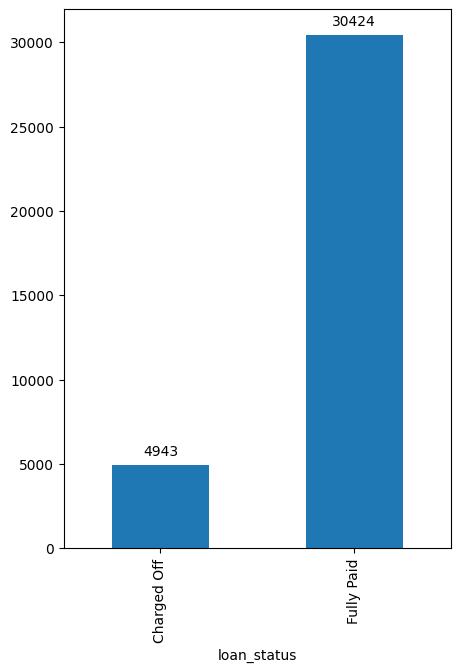

In [82]:
plt.figure(figsize=(5,7))
ax = final_dataset.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [83]:
print("%.2f" % (final_dataset.loc[final_dataset['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_dataset)))

13.98


<mark>Approximately **14%** of loans in the dataset are **defaulted**.</mark>
<br>Variables that lead to a default percentage exceeding 16.5% should be flagged as potential business risks.
(A 16.5% threshold represents an 18% increase from the baseline default rate of 14% - a significant rise.)


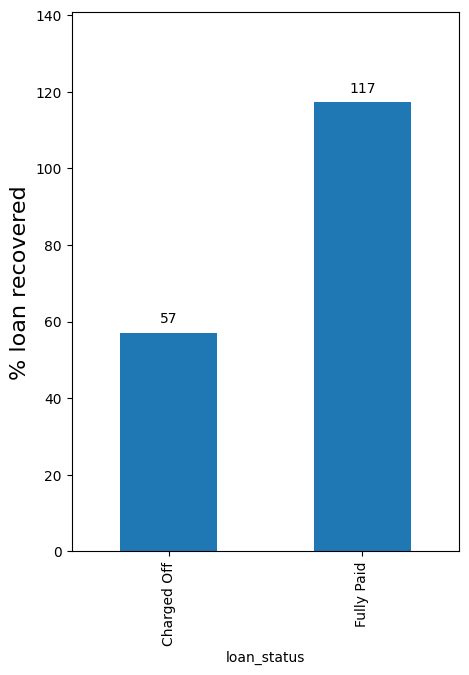

In [84]:
plt.figure(figsize=(5,7))
ax = (final_dataset.groupby('loan_status').total_pymnt.sum() * 100 / final_dataset.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

<mark>Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit. </mark>

### Let us see graphs of some other important variables 

#### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

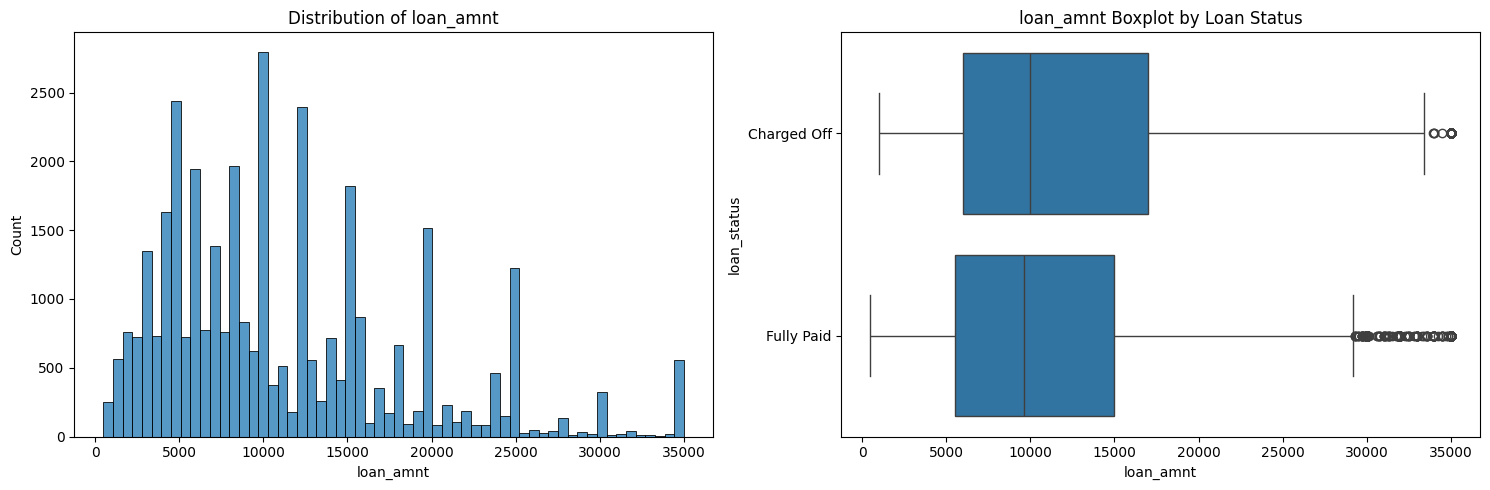

In [85]:
plot_distribution(final_dataset, 'loan_amnt')

In [86]:
final_dataset.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  12286.147077  8064.255961  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10945.731166  7181.867451   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

---
<mark>Approximately **14%** of loans in the dataset are **defaulted.**</mark>
<br>Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. 
(16.5 is 18% higher than 13.97 - a large enough increase) 

In [87]:
#Create Derived categorical variable
final_dataset['loan_amnt_bin'] = pd.cut(final_dataset['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3418464293.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataframe.groupby(['loan_status', by_column])[by_column].count()
C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3418464293.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_column = dataframe.groupby(by_column)[by_column].count()


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

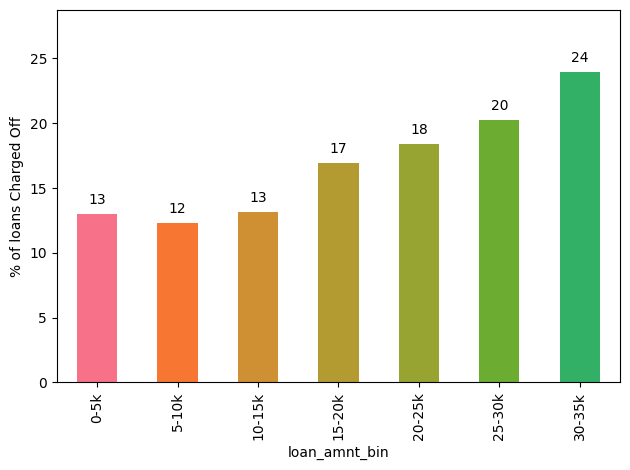

In [88]:
plot_loan_status(final_dataset, 'loan_amnt_bin')

**Observation:**
- The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default. 

---
#### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset 

In [89]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

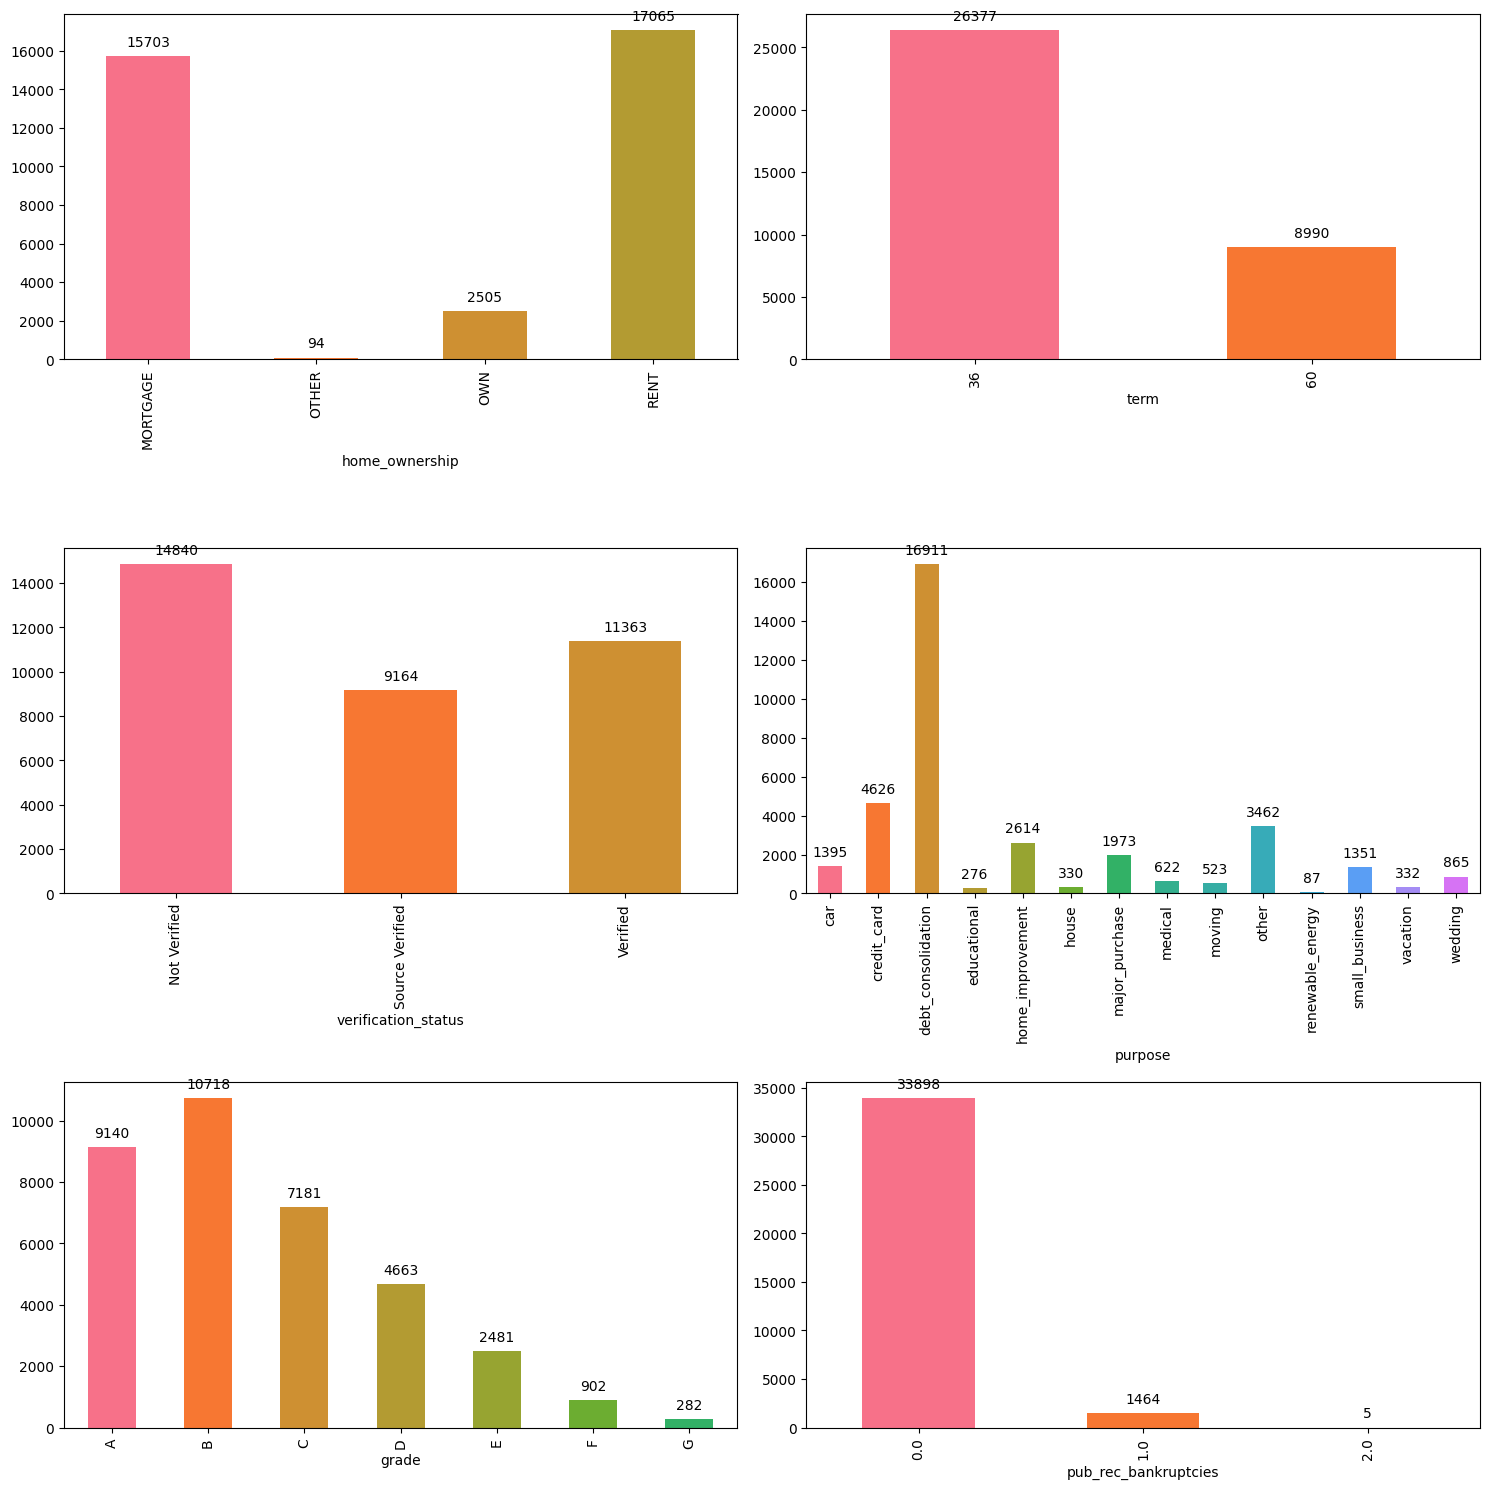

In [90]:
plt.figure(figsize=(15,15))

categoricalBarPlots(final_dataset, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark>

---
#### Power Law
Do some of these variables exhibit the power law? Let's see. 

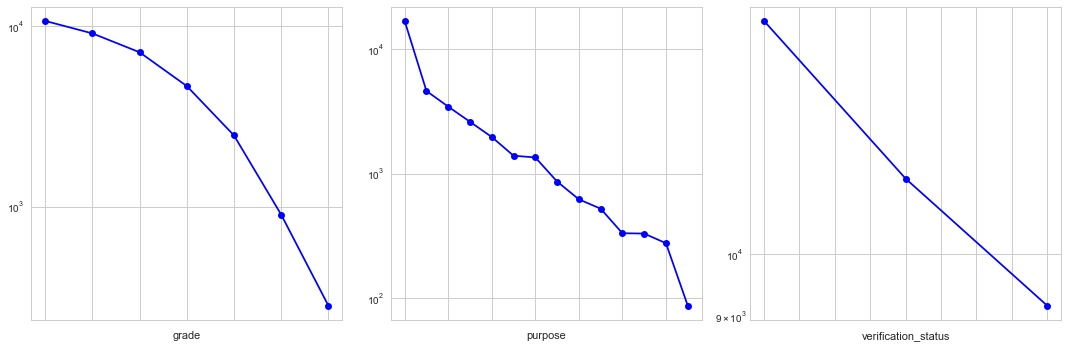

In [159]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
final_dataset.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
final_dataset.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
final_dataset.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

<mark>purpose and verification_status follow the power law</mark>

---
#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

<Figure size 1000x500 with 0 Axes>

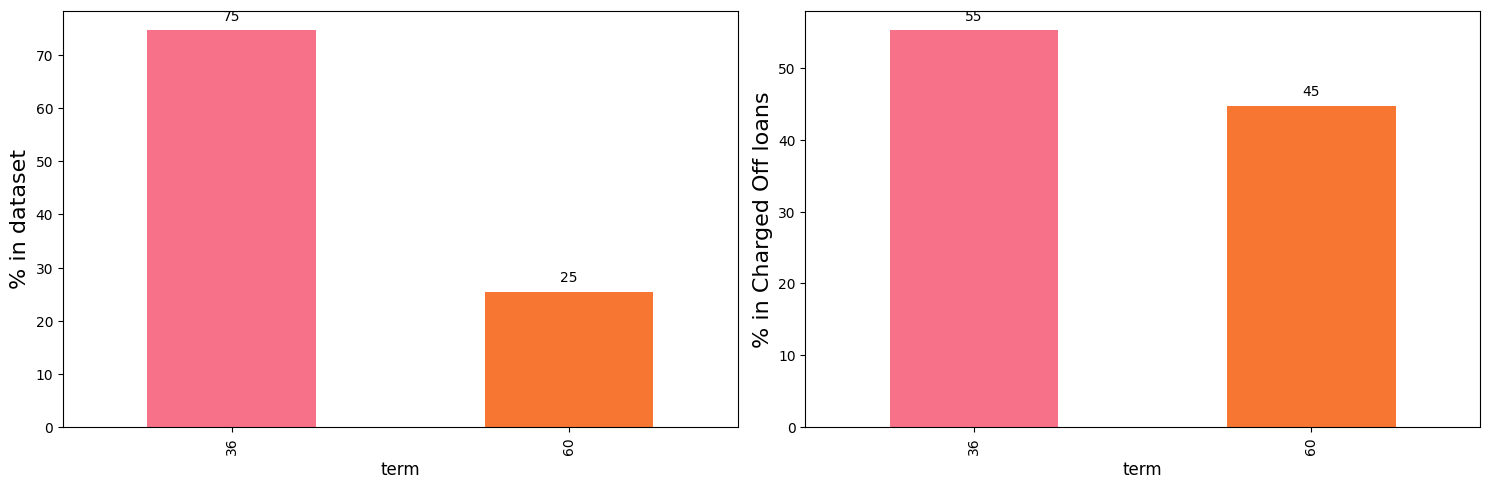

In [91]:
plt.figure(figsize=(10,5))
plot_percentages(final_dataset, 'term')

**Observation:**
-  Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
-  Among Charged Off loans, percentage of term 60 months rises to 45%. <mark>The higher term loans have a higher chance of default.</mark>  

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

<Figure size 1500x500 with 0 Axes>

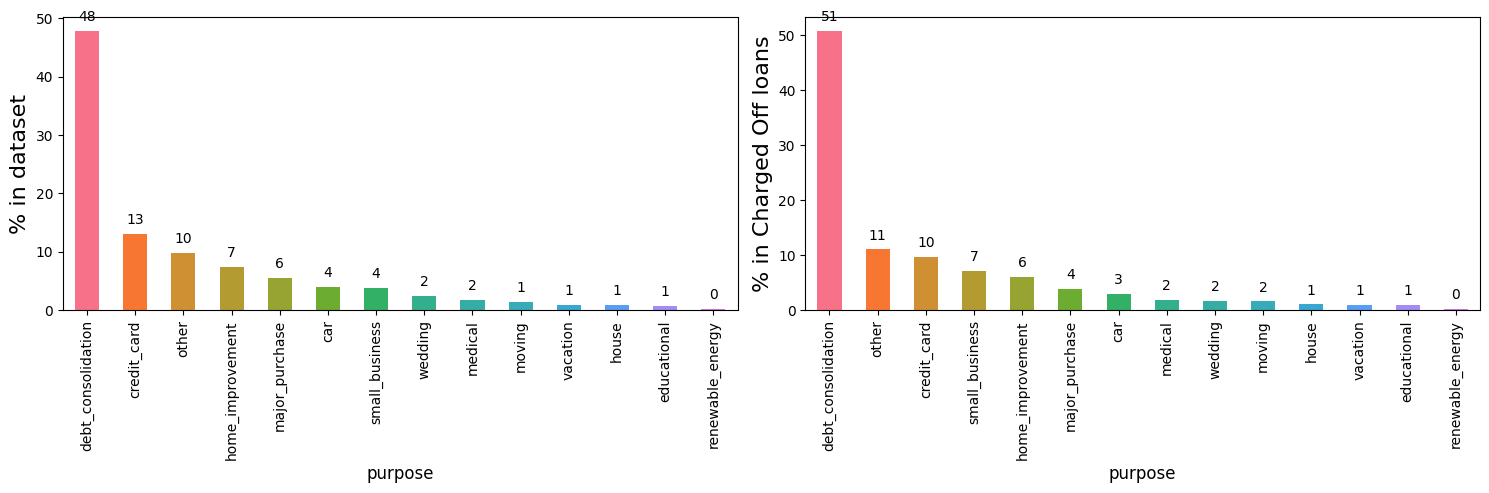

In [92]:
plt.figure(figsize=(15,5))
plot_percentages(final_dataset, 'purpose')

**Observation:**
-  <mark>The category 'small_business' percentage **doubles from 3.8 to 7.2** for Charged Off loans.</mark> Let's see how the categories of this variable behave. 

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

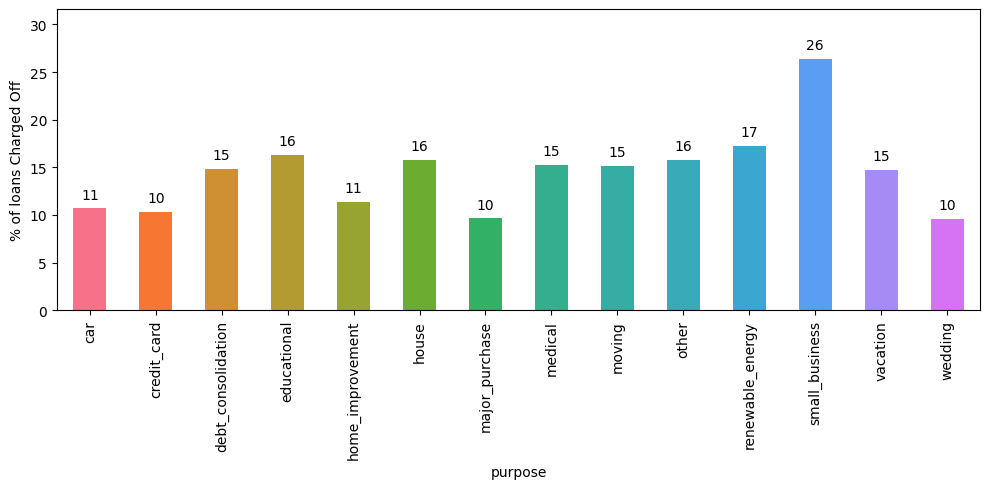

In [93]:
plt.figure(figsize=(10, 5))
plot_loan_status(final_dataset, 'purpose')

**Observation:**
-  <mark>26% of loans for small business are Charged Off. Making them the most risky purpose.</mark> 
- Approximately ~49% of the loans are issued for the purpose of dept consolidation.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance. 

---
#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

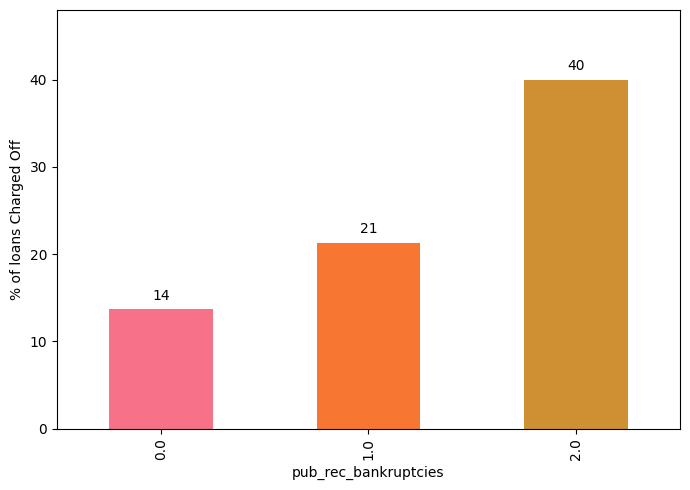

In [94]:
plt.figure(figsize=(7,5))
plot_loan_status(final_dataset, 'pub_rec_bankruptcies')

**Observation:**
-  <mark>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.</mark> 

---
#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [95]:
final_dataset.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1500x500 with 0 Axes>

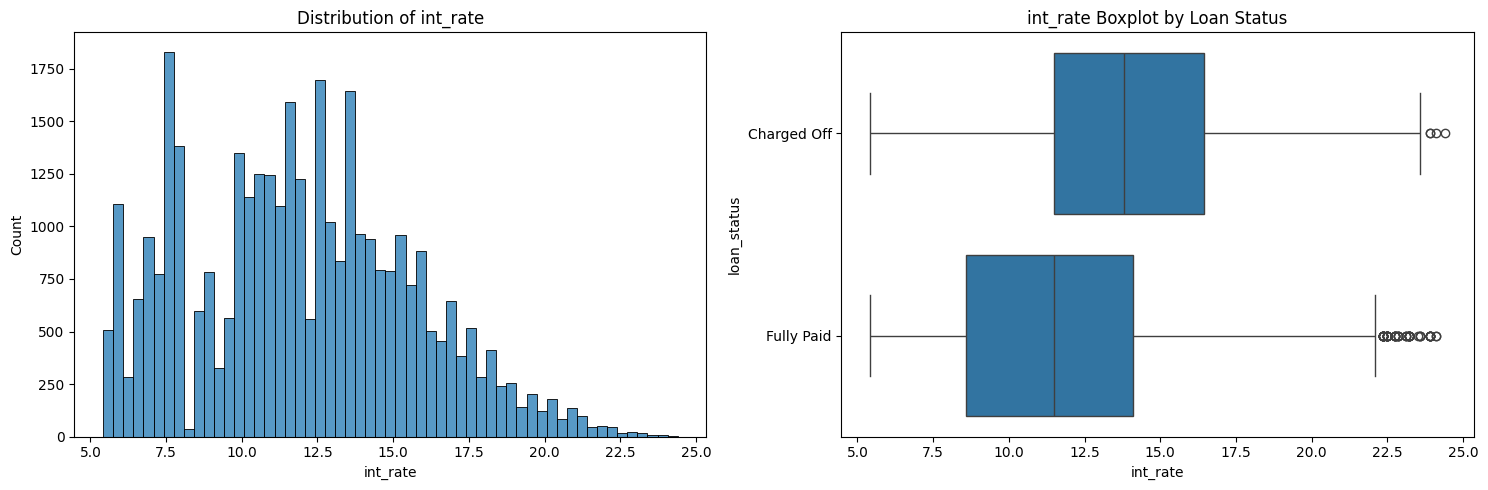

In [96]:
plt.figure(figsize=(15,5))
plot_distribution(final_dataset, 'int_rate')

In [97]:
final_dataset.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11

**Observation:**
-  Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more - 

In [98]:
final_dataset['interest_rate_buckets'] = round(final_dataset['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

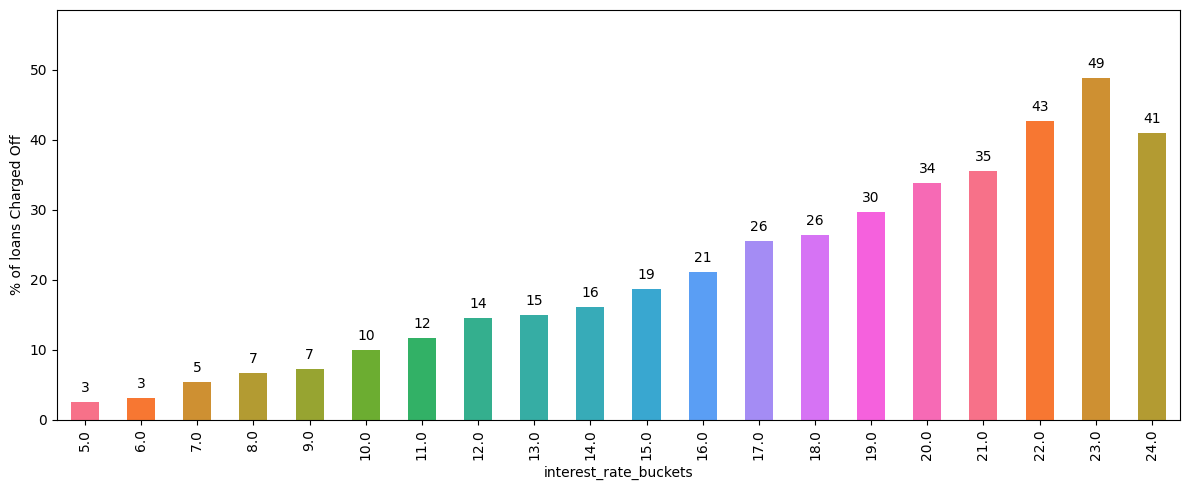

In [99]:
plt.figure(figsize=(12,5))
plot_loan_status(final_dataset, 'interest_rate_buckets')


---
#### Variable: installment
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [100]:
final_dataset.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

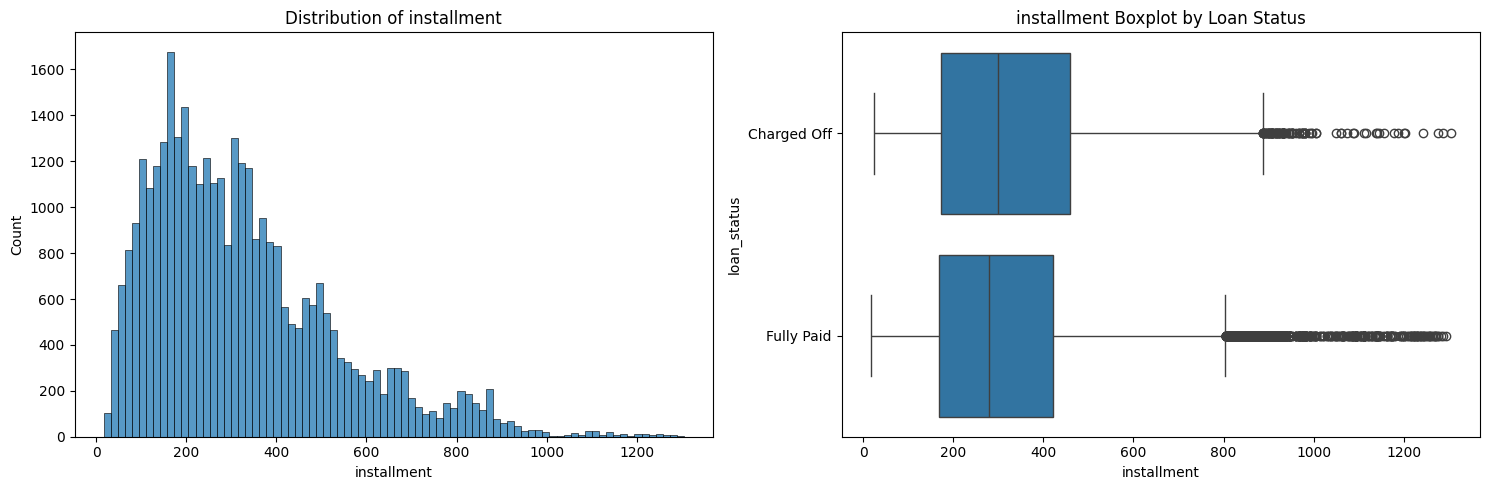

In [101]:
plt.figure(figsize=(15,5))
plot_distribution(final_dataset, 'installment')

In [102]:
final_dataset.groupby('loan_status')['installment'].describe()

count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21

**Observation:**
-  installment amount varies largely between 170.08 to 420 with median of 280
-  loans Charged Off have high installment on average 

---
#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [103]:
final_dataset.grade.value_counts()

grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [104]:
final_dataset.sub_grade.value_counts(normalize=True).head()

sub_grade
A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: proportion, dtype: float64

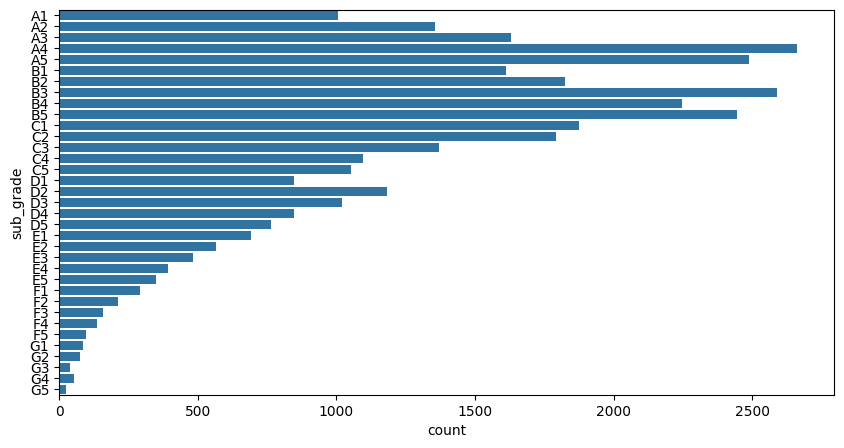

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(final_dataset['sub_grade'], order=sorted(final_dataset.sub_grade.unique()))
plt.show()

<Figure size 1500x500 with 0 Axes>

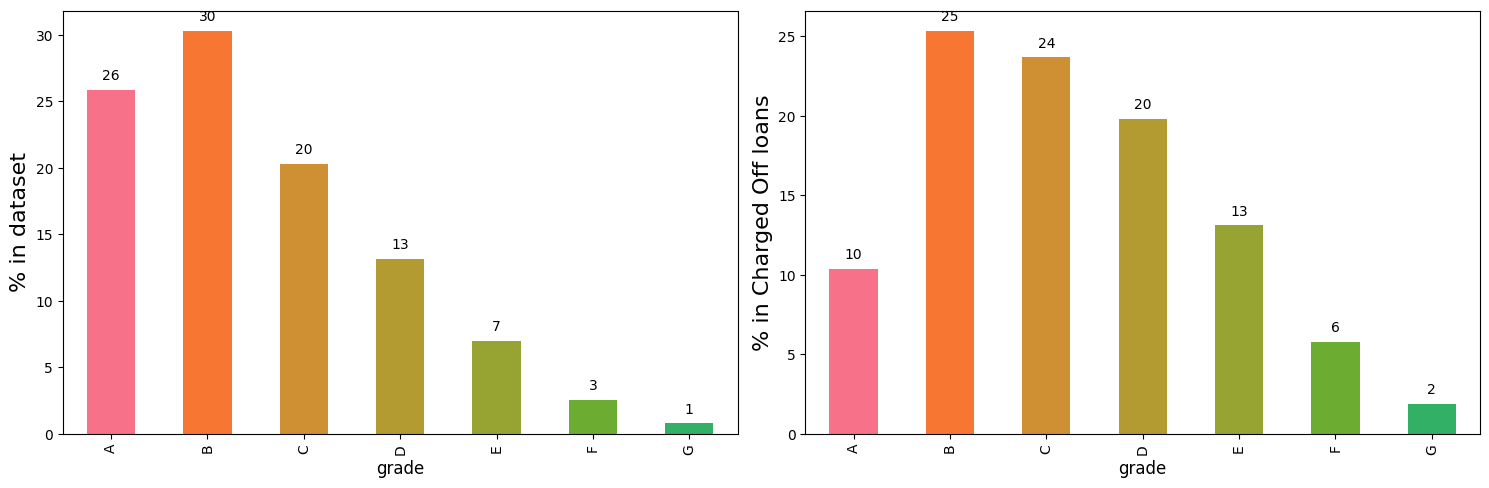

In [106]:
plt.figure(figsize=(15,5))
plot_percentages(final_dataset, 'grade', True)

**Observation:**
-  Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans. 
- Grade D, E, F, G loans are less safe. <mark>We should plot grade by percentage Charged Off by category</mark>
- Lending Clubs grading system is working well. 

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

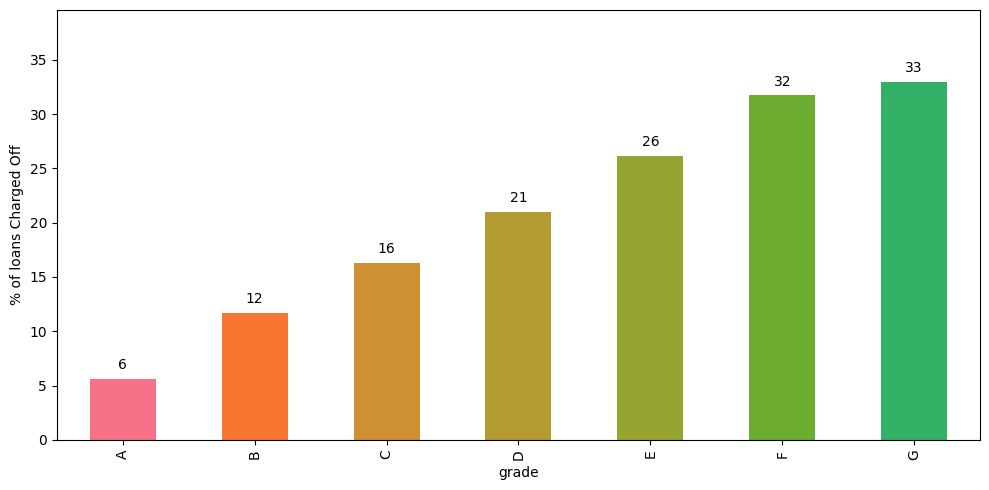

In [107]:
plt.figure(figsize=(10,5))
plot_loan_status(final_dataset, 'grade')

**Observation:**
- Nearly 30% of all loans in Grades F and G see a default. 
- Grade E onwards are risky, and less numerous. <mark>Lending Club should either refuse loans or charge high interest rates.</mark>

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

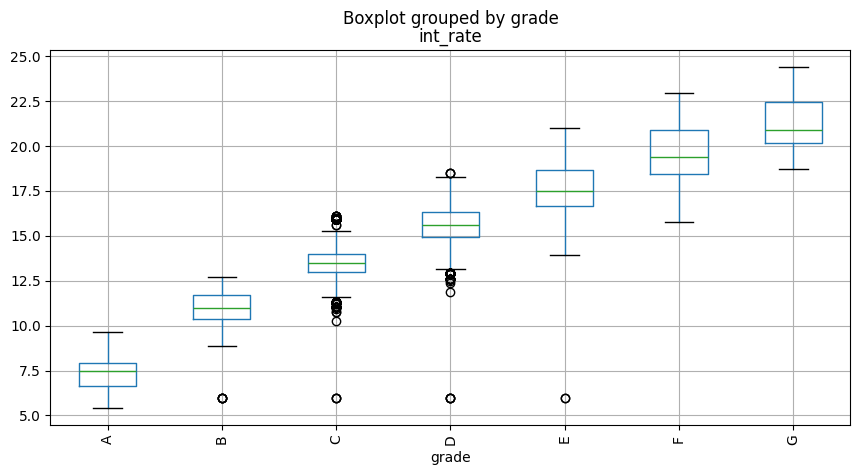

In [108]:
fig, ax = plt.subplots(figsize=(10,5))
final_dataset.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

**Observation:**
- Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans. 

---
#### Variable - emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [109]:
top10_emp_title = final_dataset.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

emp_title
US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: count, dtype: int64

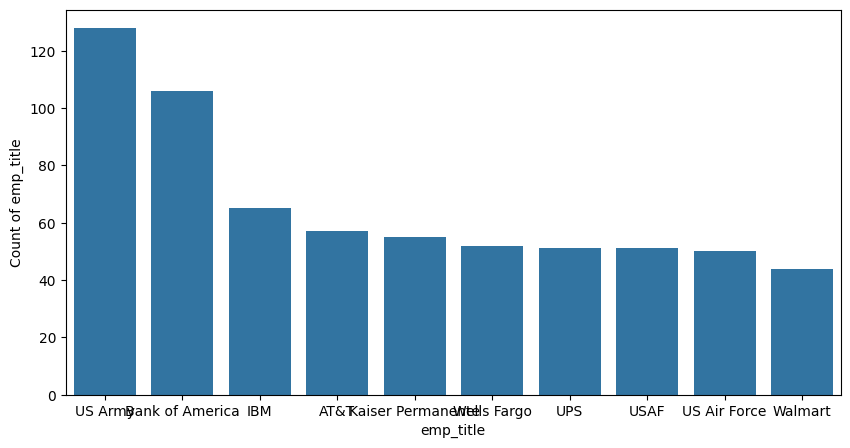

In [110]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**
-  Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- <mark>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

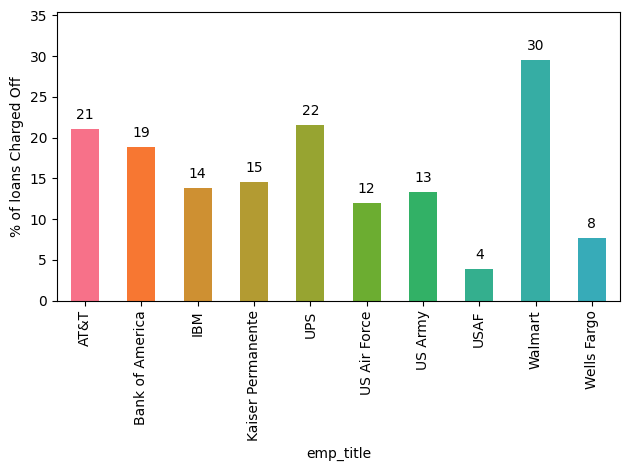

In [111]:
plot_loan_status(final_dataset[final_dataset['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

---
#### Variable - emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [112]:
final_dataset.emp_length.value_counts(normalize=True)

emp_length
10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: proportion, dtype: float64

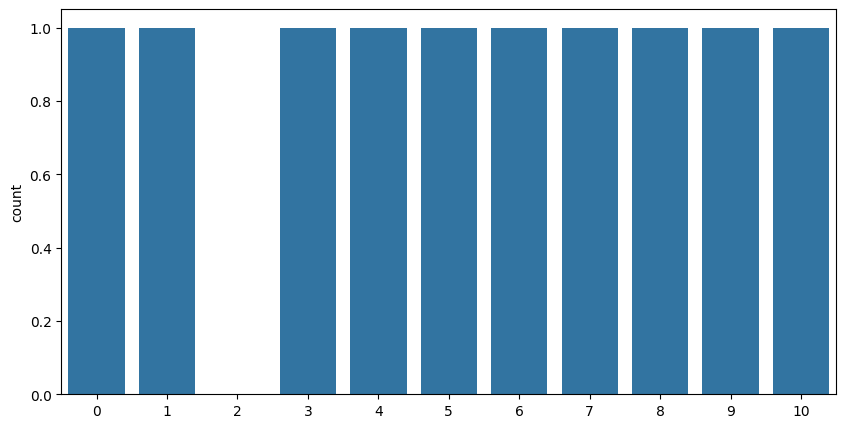

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(final_dataset['emp_length'], order=sorted(final_dataset.emp_length.unique()))
plt.show()

<Figure size 1500x500 with 0 Axes>

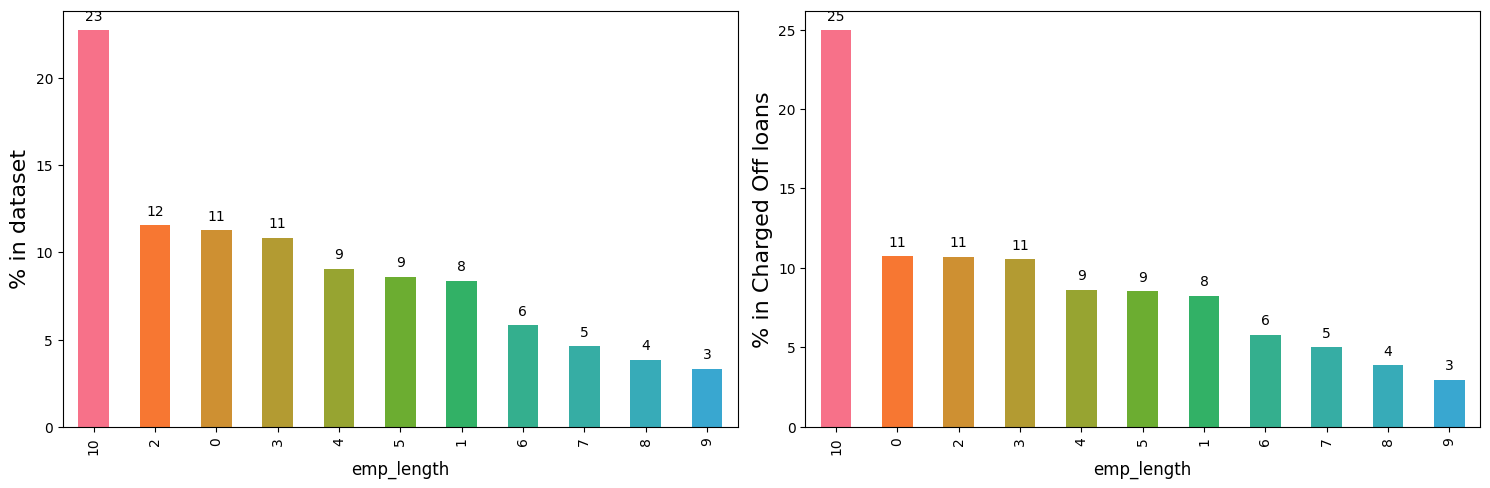

In [114]:
plt.figure(figsize=(15, 5))
plot_percentages(final_dataset, 'emp_length')

**Observation:**
- 22.7% of the of loan taker have an employment length of more than 10 years.
- <mark>There is no impact of employment length to chance of loan default.</mark>

---
#### Variable - home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

<Figure size 1000x500 with 0 Axes>

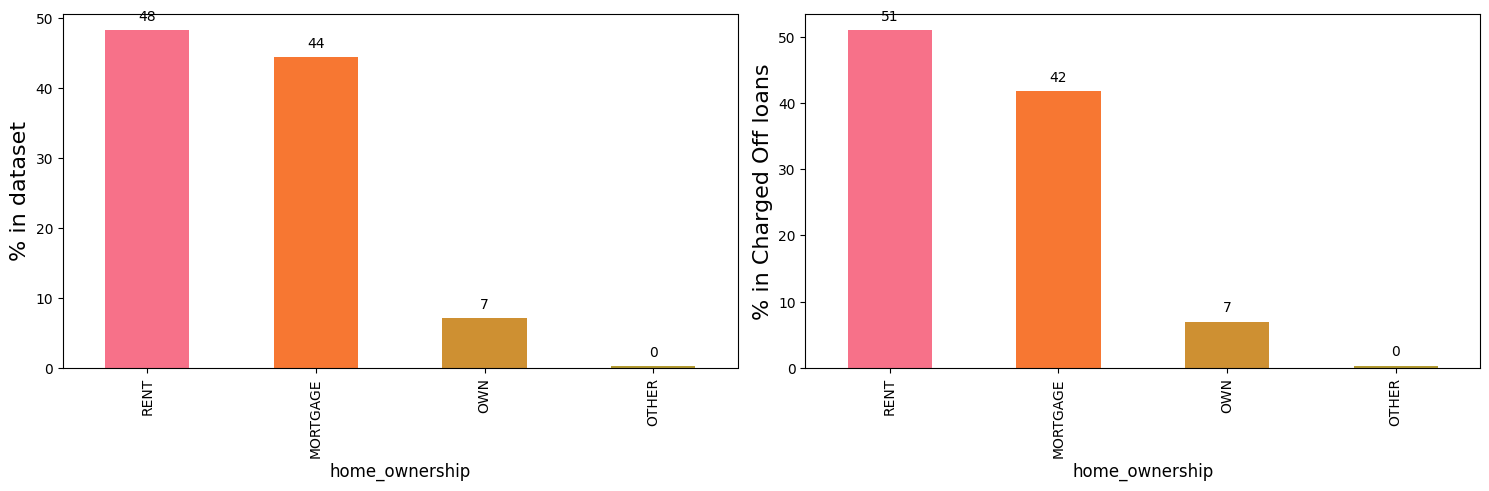

In [115]:
plt.figure(figsize=(10,5))
plot_percentages(final_dataset, 'home_ownership')

**Observation:**
- <mark>There is no impact of home_ownership to propensity to default on loan.</mark>


#### Variable - annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [116]:
final_dataset.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

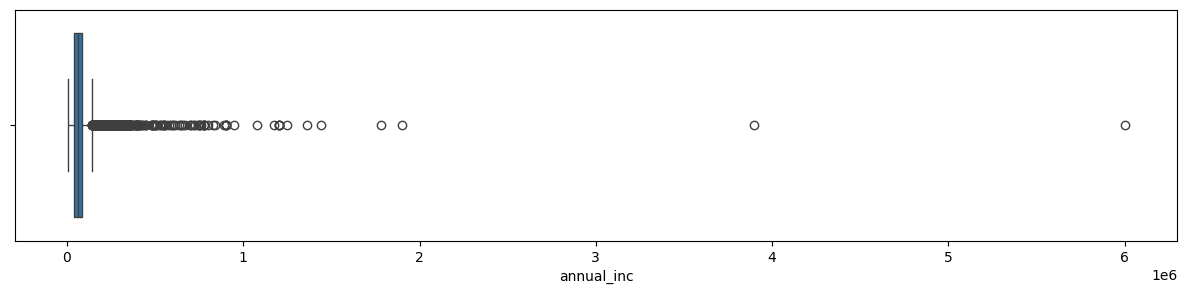

In [117]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=final_dataset['annual_inc'], data=final_dataset)

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. <mark>There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).</mark>
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

In [118]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = final_dataset[np.abs(final_dataset.annual_inc-final_dataset.annual_inc.mean()) <= (3*final_dataset.annual_inc.std())]

In [119]:
df.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3204015255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'], hist_kws={'log':False})


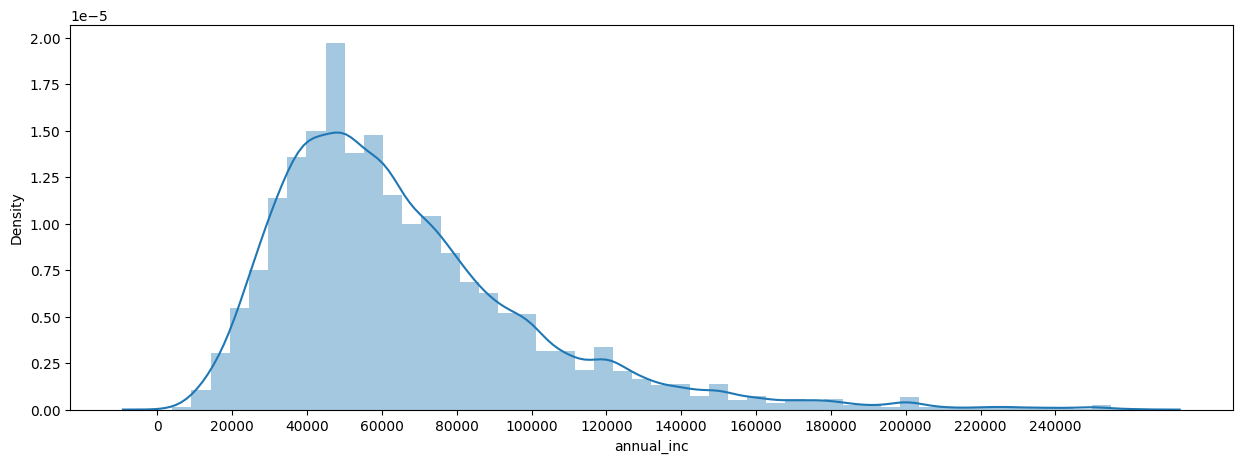

In [120]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation:**
-  10000 seems to be a good bin size to further analyze income as categories 

In [121]:
#Create Derived categorical variable
final_dataset['income_bin'] = final_dataset['annual_inc']/20000
#final_dataset['income_bin'] = pd.cut(final_dataset['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
final_dataset['income_bin'] = final_dataset['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

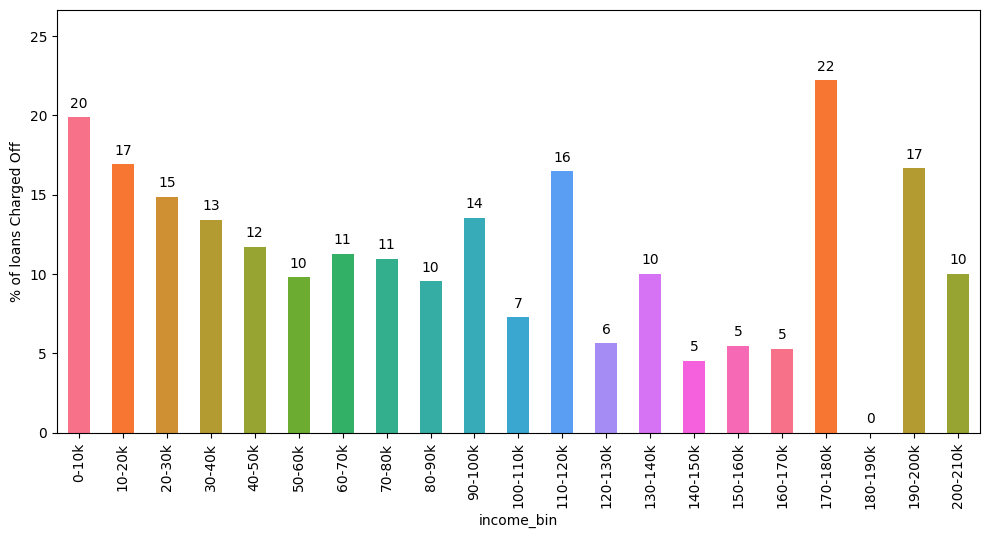

In [122]:
plt.figure(figsize=(10,5))
ax = plot_loan_status(final_dataset.loc[final_dataset['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- <mark>Loan defaults are higher for lower income, and progressively reduce as incomes go up.</mark>
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later. 

---
#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [191]:
final_dataset.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

<Figure size 2000x500 with 0 Axes>

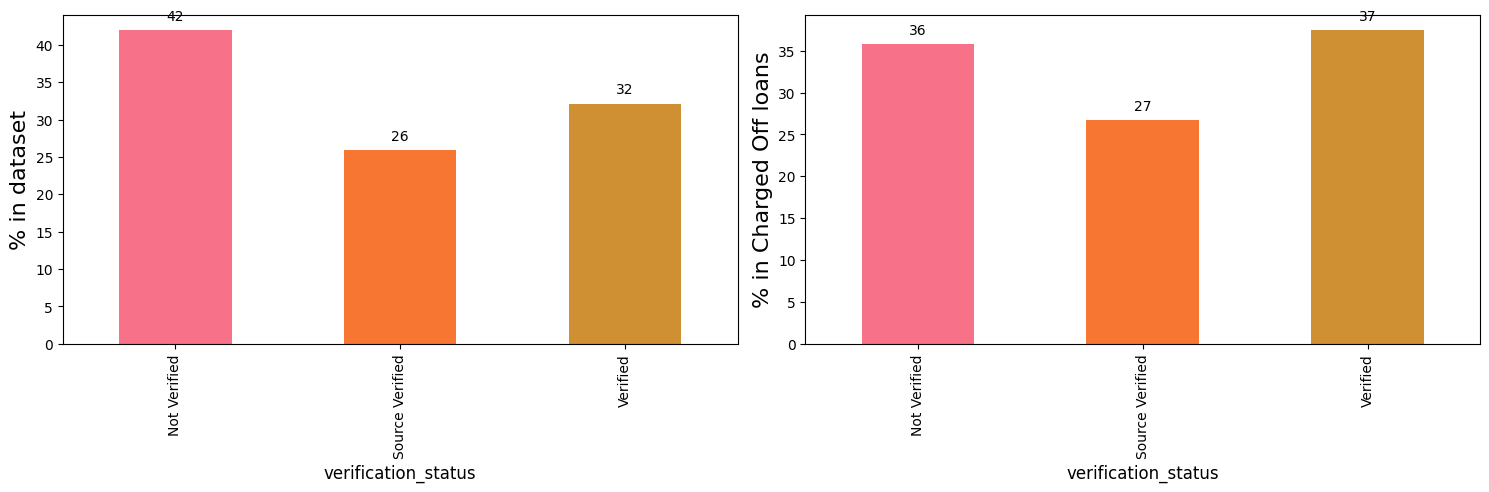

In [123]:
plt.figure(figsize=(20,5))
plot_percentages(final_dataset, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis 

#### Variable: issue_d
Data_Dictionary: The month which the loan was funded

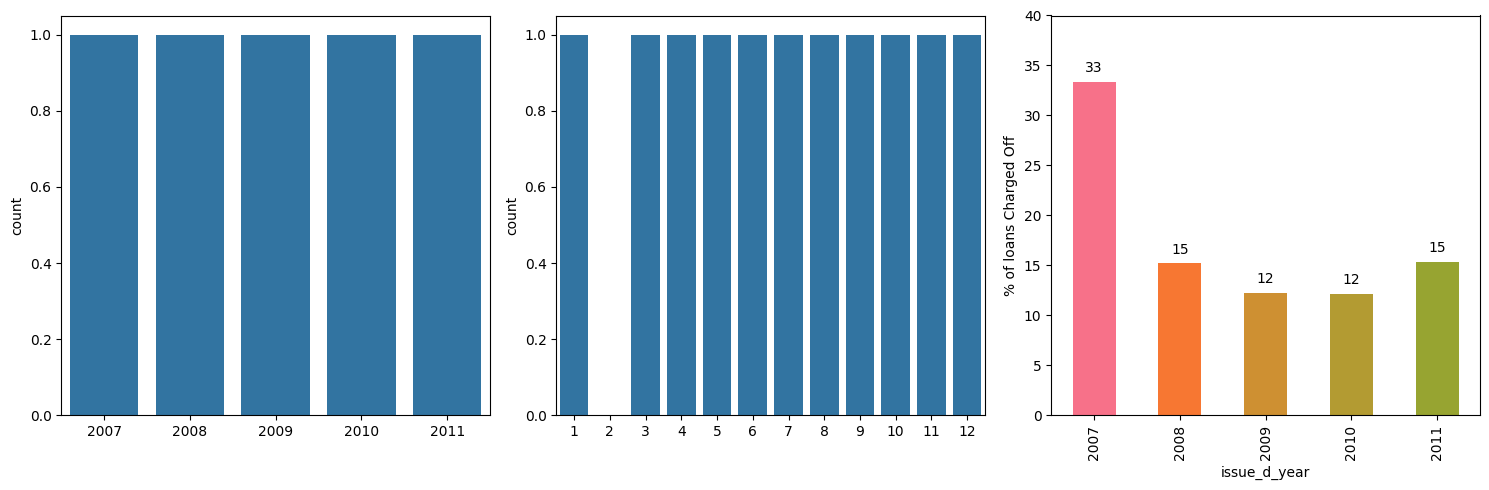

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(final_dataset['issue_d_year'], order=sorted(final_dataset.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(final_dataset['issue_d_month'], order=sorted(final_dataset.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plot_loan_status(final_dataset, 'issue_d_year')

plt.show()


**Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year? 
-  Year of loan has no significant effect on likelihood of default. 

<Axes: xlabel='issue_d_month', ylabel='% of loans Charged Off'>

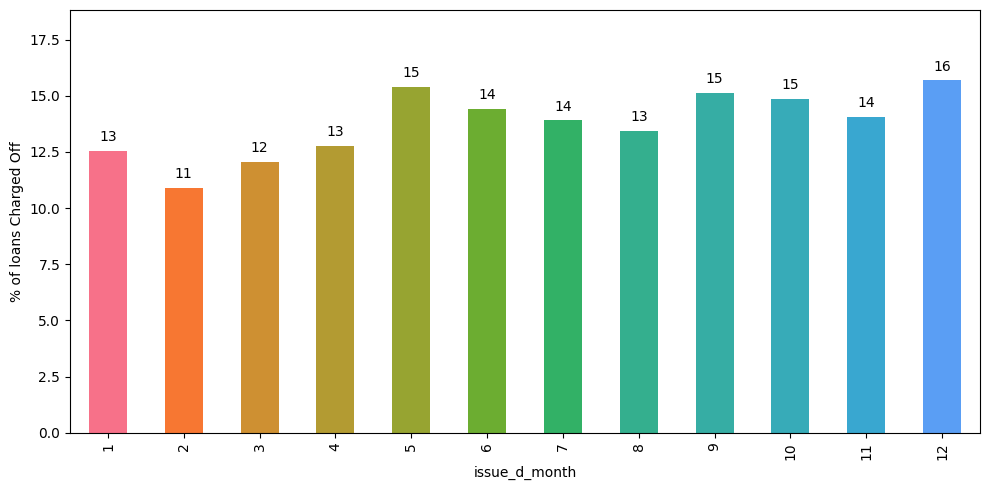

In [125]:
plt.figure(figsize=(10, 5))
plot_loan_status(final_dataset, 'issue_d_month')

**Observation:**
-  Month of loan is spread out and has no significant effect on likelihood of default. 

---
#### Variable - title
Data_Dictionary: The loan title provided by the borrower

In [126]:
final_dataset.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [127]:
final_dataset.title.value_counts().head(10)

title
Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: count, dtype: int64

**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [128]:
final_dataset = final_dataset.drop('title',axis =1 )

---
#### Variable - addr_state
Data_Dictionary: The state provided by the borrower in the loan application

In [129]:
final_dataset.addr_state.value_counts(normalize=True).head(10)

addr_state
CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: proportion, dtype: float64

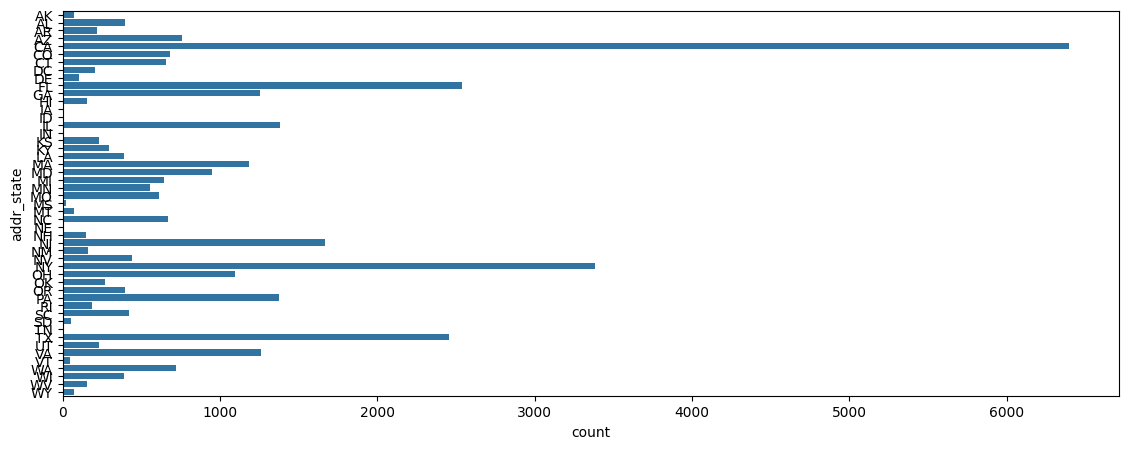

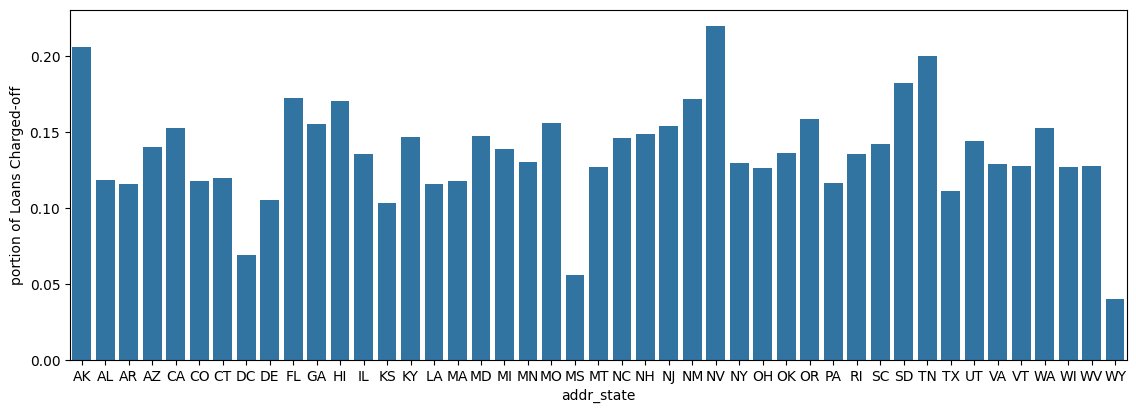

In [130]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(final_dataset['addr_state'], order=sorted(final_dataset.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = final_dataset.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = final_dataset.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()


**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default. 


---
#### Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [131]:
final_dataset.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

The dti index varies from min 0 to max of 30. The median dti is of 13.5

<Figure size 1000x500 with 0 Axes>

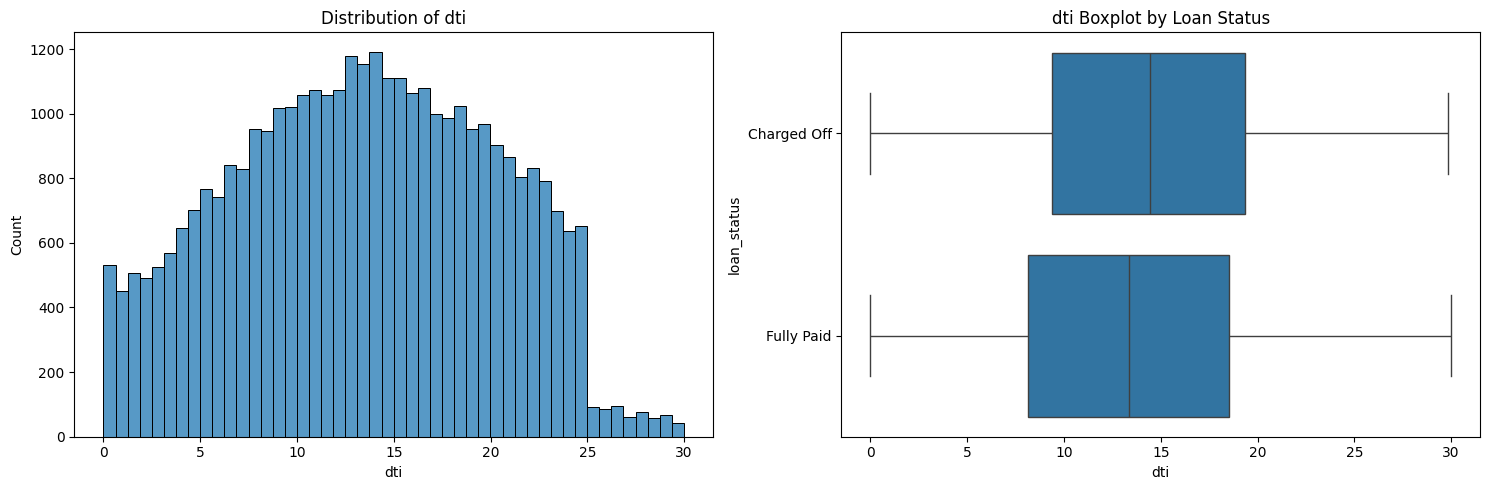

In [132]:
plt.figure(figsize=(10,5))

plot_distribution(final_dataset, 'dti')

In [133]:
# Create derived variable 
final_dataset['dti_bin'] = pd.cut(final_dataset['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3418464293.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataframe.groupby(['loan_status', by_column])[by_column].count()
C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3418464293.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_column = dataframe.groupby(by_column)[by_column].count()


<Axes: xlabel='dti_bin', ylabel='% of loans Charged Off'>

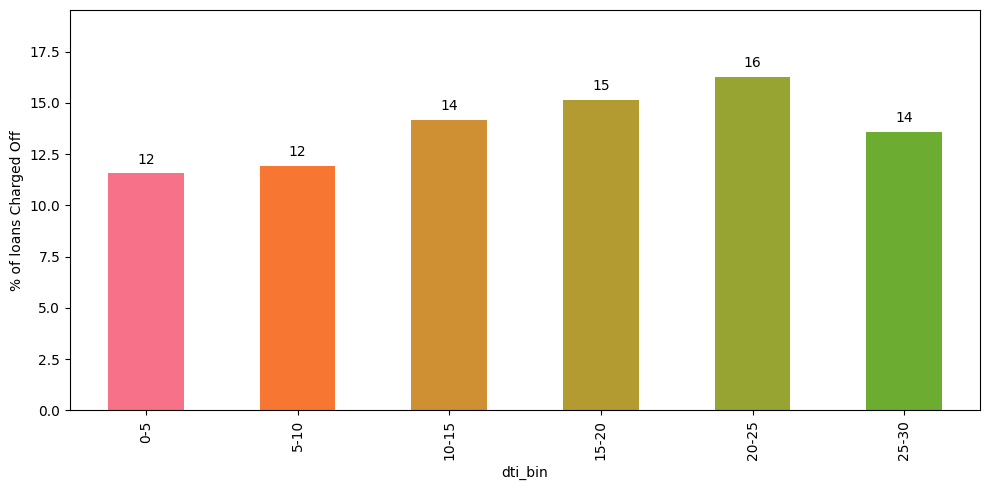

In [134]:
plt.figure(figsize=(10,5))
plot_loan_status(final_dataset, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

---
#### Variable - delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [135]:
final_dataset.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
9     0.000028
11    0.000028
Name: proportion, dtype: float64

<Axes: xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

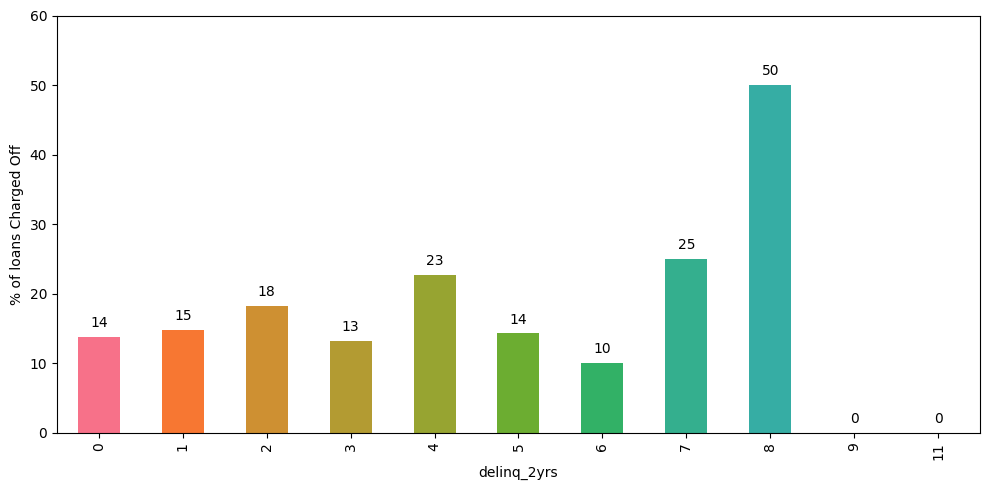

In [136]:
plt.figure(figsize=(10,5))
plot_loan_status(final_dataset, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1. 


---
#### Variable - earliest_cr_line
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [137]:
final_dataset.earliest_cr_line_year.value_counts(normalize=True).head()

earliest_cr_line_year
2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: proportion, dtype: float64

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\14472901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset['earliest_cr_line_year'])


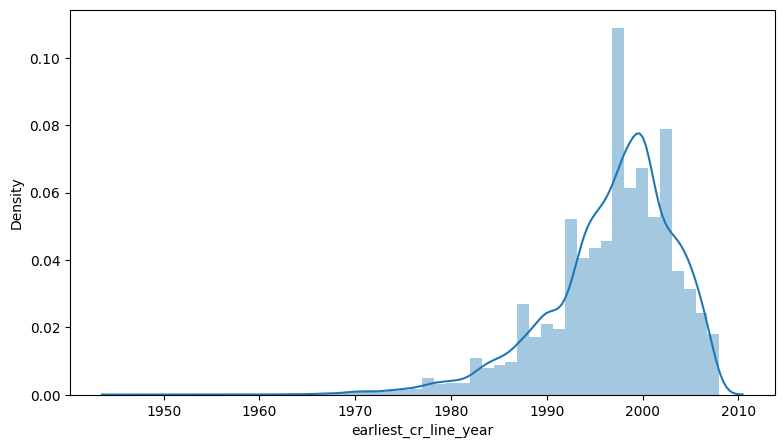

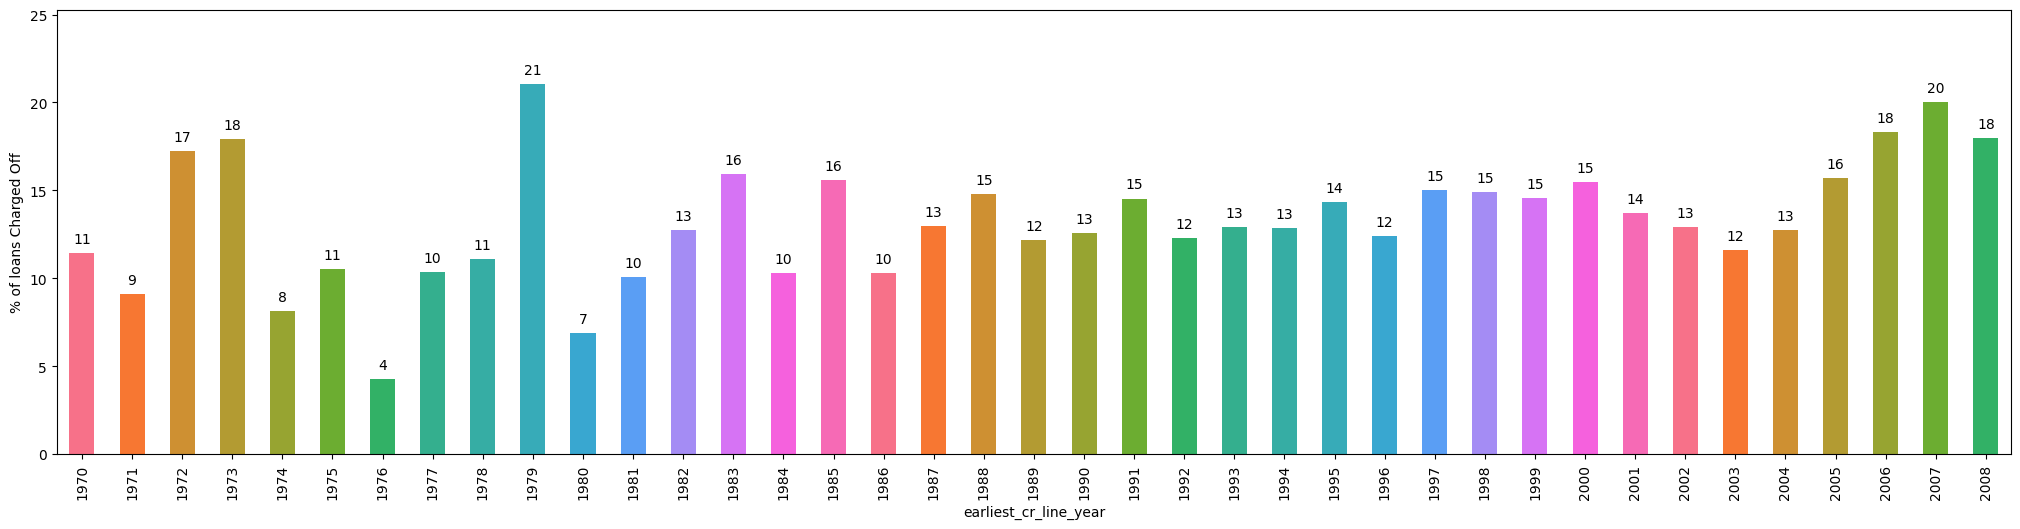

In [138]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(final_dataset['earliest_cr_line_year'])


plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plot_loan_status(final_dataset.loc[final_dataset['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()


**Observation:**
-  8% of loan applicants have a credit line starting in the year 2000.
- Newer borrowers exhibit a higher default rate, which may be linked to the 2008 subprime crisis.
- Similarly, during the economic downturn in the US starting in 1978, borrowers initiating their credit lines during that period also defaulted more frequently. Generally, in


---
#### Variable - inq_last_6mths
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [139]:
final_dataset.inq_last_6mths.value_counts(normalize=True)

inq_last_6mths
0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: proportion, dtype: float64

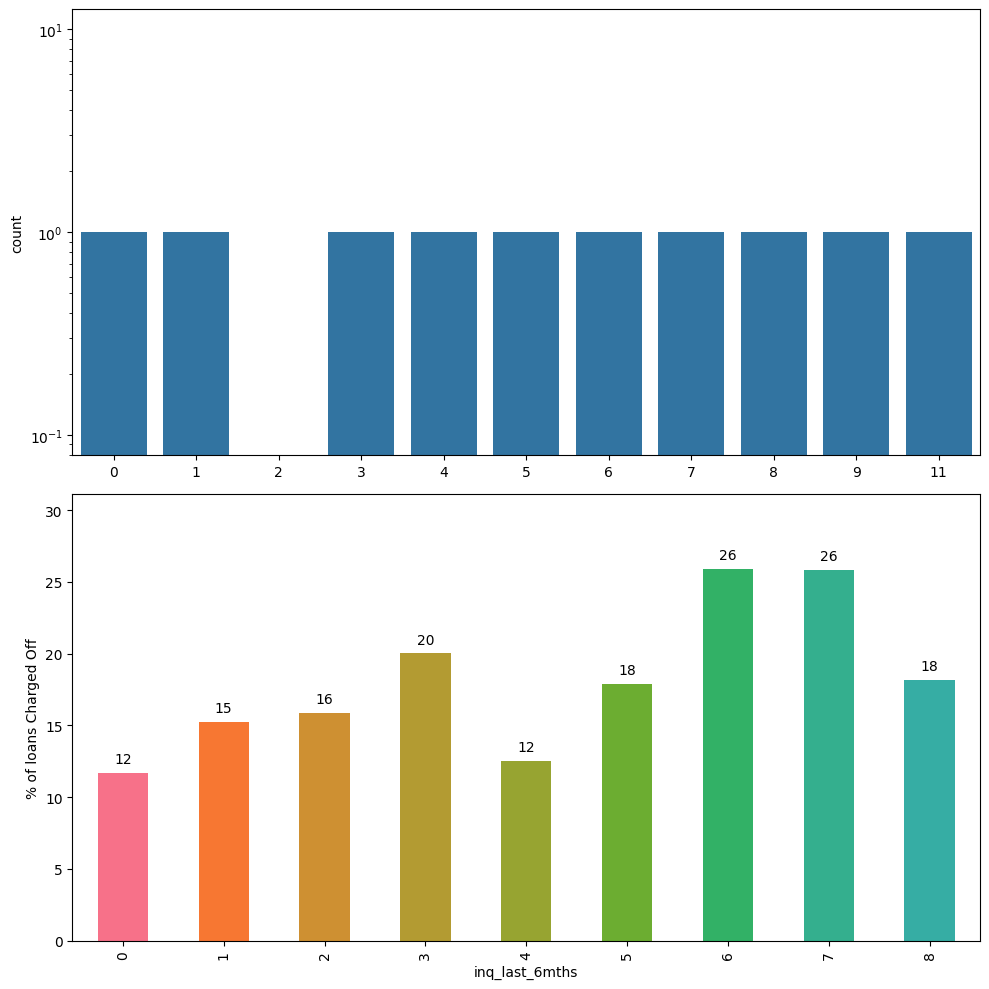

In [140]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(final_dataset['inq_last_6mths'], order=sorted(final_dataset.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plot_loan_status(final_dataset, 'inq_last_6mths')
plt.show()

**Observation:**
-  48.5% of borrowers have no inquiries.
- Borrowers with more than 2 inquiries tend to default at higher rates. 
- This correlation is likely linked to having multiple loans and can be disregarded, as revolving line utilization will account for this.


---
#### Variable - open_acc
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [141]:
final_dataset.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

<Figure size 1500x500 with 0 Axes>

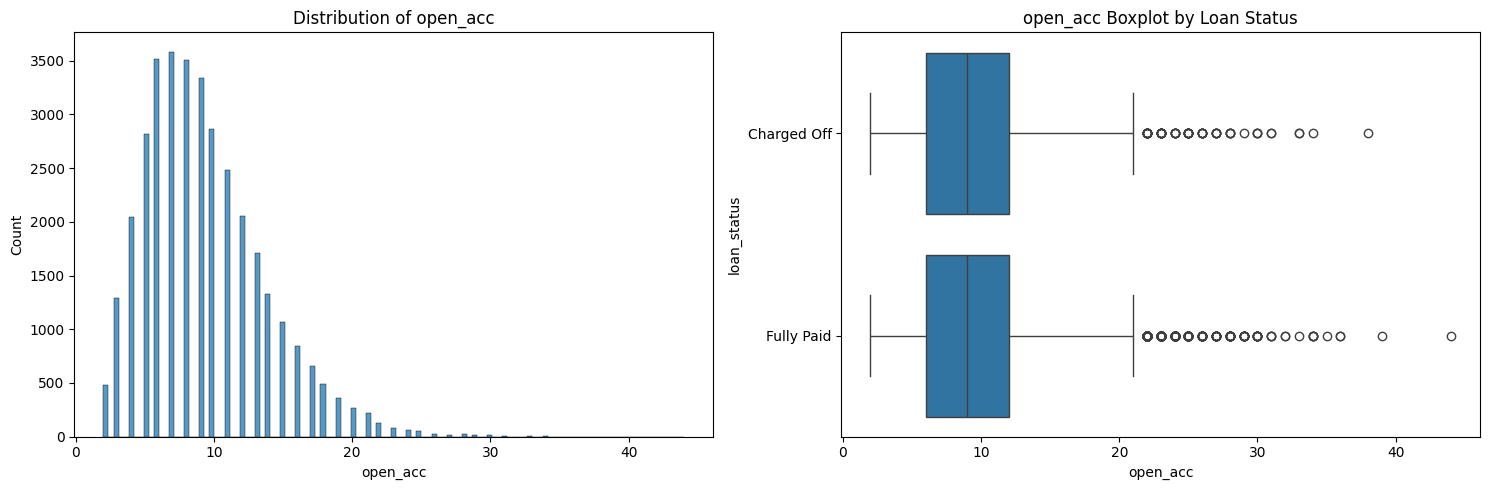

In [142]:
plt.figure(figsize=(15,5))
plot_distribution(final_dataset, 'open_acc')
plt.show()

In [143]:
final_dataset.groupby('loan_status')['open_acc'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4943.0  9.308517  4.491786  2.0  6.0  9.0  12.0  38.0
Fully Paid   30424.0  9.335820  4.355764  2.0  6.0  9.0  12.0  44.0

**Observation:**
-  The median of the distribution suggests that borrowers generally have 9 open credit lines.
- There is no notable difference in the number of credit lines between charged off and fully paid loans.


---
#### Variable - pub_rec
Data_Dictionary: Number of derogatory public records.

In [144]:
final_dataset.pub_rec.value_counts(normalize=True)

pub_rec
0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: proportion, dtype: float64

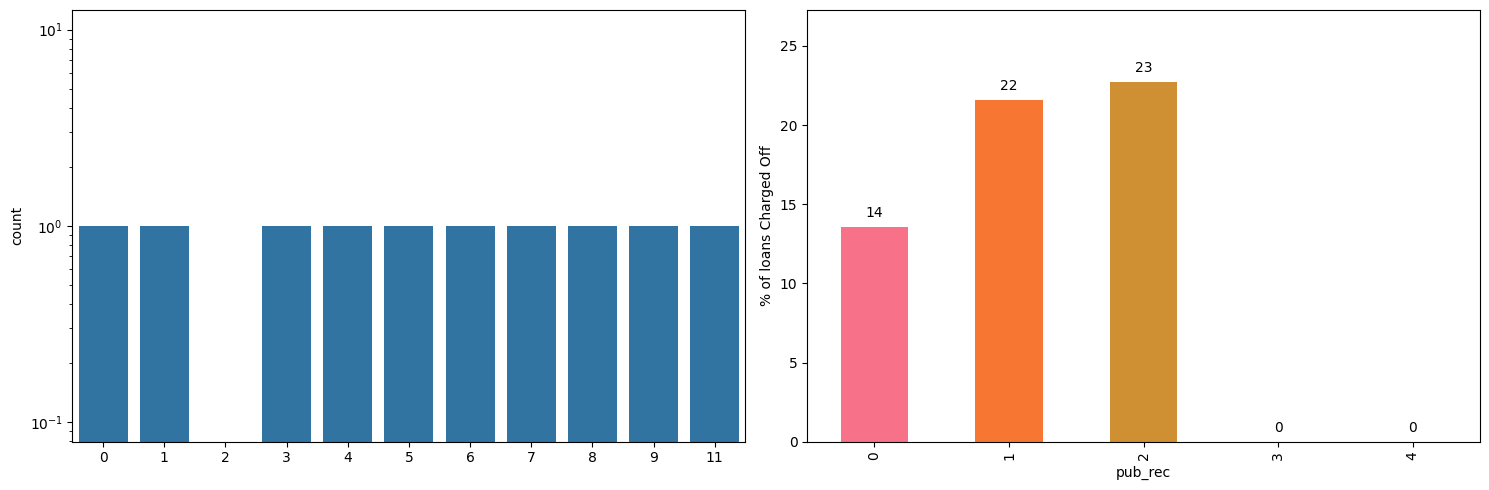

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(final_dataset['pub_rec'], order=sorted(final_dataset.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plot_loan_status(final_dataset, 'pub_rec')
plt.show()



**Observation:**
- 94% of borrowers have no public derogatory records, while 5% have 1 derogatory record.
- The presence of even one derogatory record significantly increases the likelihood of charge off.


---
#### Variable - revol_bal
Data_Dictionary: Total credit revolving balance

In [146]:
final_dataset.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~9000.

In [147]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_dataset = final_dataset[np.abs(final_dataset.revol_bal-final_dataset.revol_bal.mean()) <= (3*final_dataset.revol_bal.std())]

The values vary a lot. Transforming to a log scale will help analyse better.

In [148]:
final_dataset['revol_bal_log'] = final_dataset['revol_bal'].apply(lambda x : np.log(x+1))

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3189804495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['revol_bal_log'] = final_dataset['revol_bal'].apply(lambda x : np.log(x+1))


C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\3101489382.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset['revol_bal'])


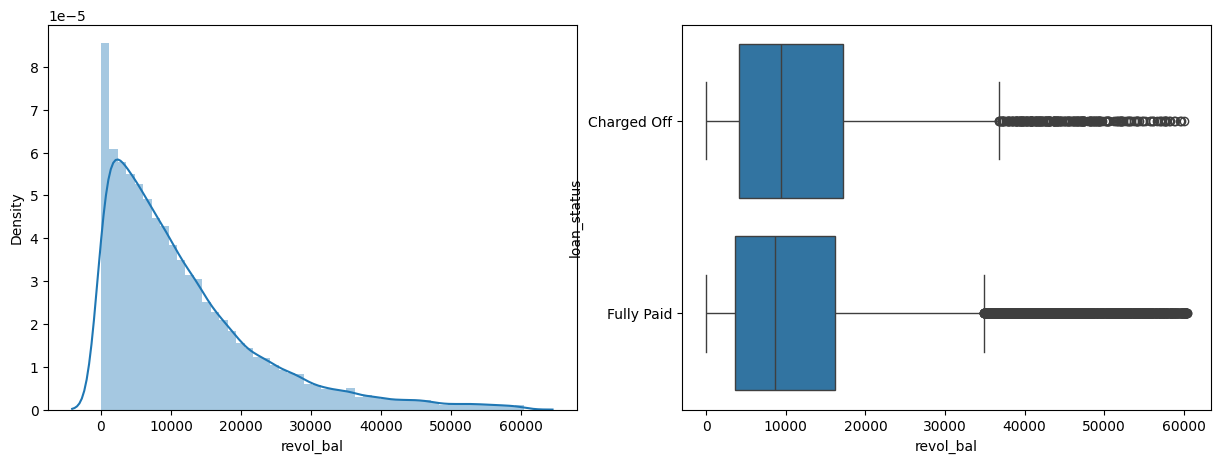

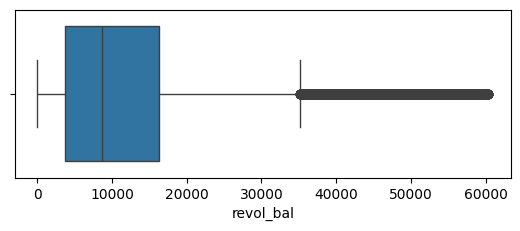

In [149]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(final_dataset['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=final_dataset['revol_bal'], y=final_dataset['loan_status'], data=final_dataset)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=final_dataset['revol_bal'], data=final_dataset)
plt.show()

In [150]:
final_dataset.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   4858.0  12453.837382  11330.139812  0.0  4161.0  9336.5   
Fully Paid   29739.0  11641.208884  10974.614732  0.0  3612.0  8581.0   

                 75%      max  
loan_status                    
Charged Off  17212.5  60071.0  
Fully Paid   16138.5  60376.0

**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans

---
#### Variable - revol_util
Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [151]:
final_dataset.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

<Axes: title={'center': 'revol_util'}, xlabel='loan_status'>

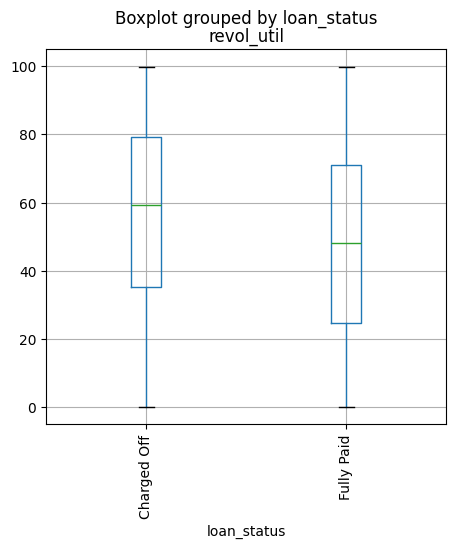

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis. 

In [153]:
final_dataset['revol_util_bin'] = round(final_dataset['revol_util']/5)

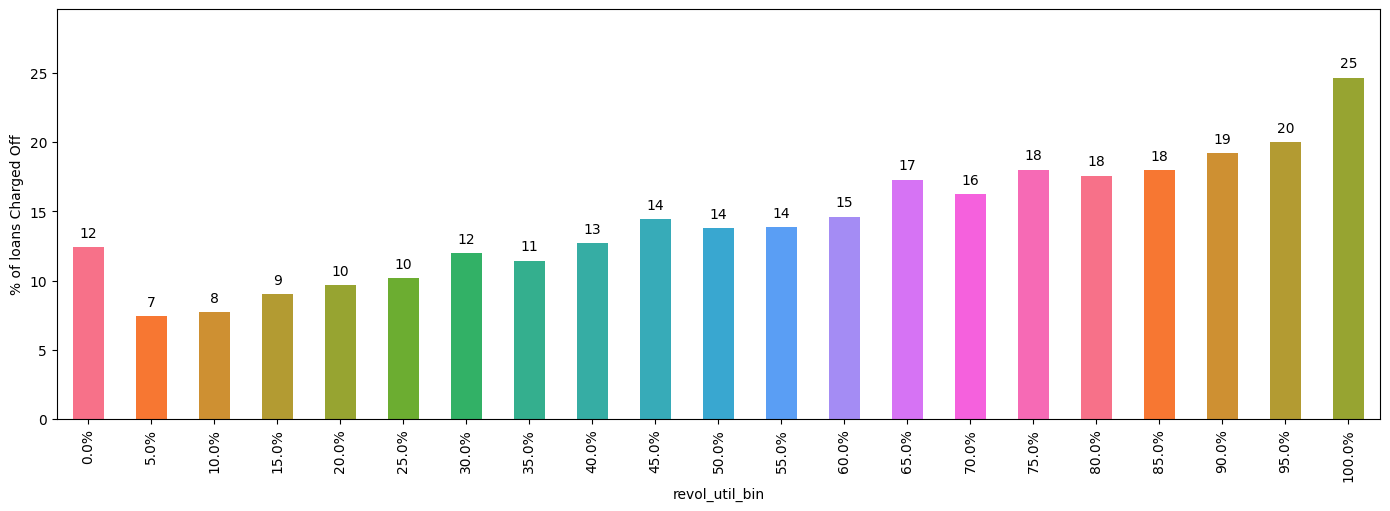

In [154]:
plt.figure(figsize=(14,5))
ax = plot_loan_status(final_dataset, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

---
#### Variable - total_acc
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [155]:
final_dataset.total_acc.describe()

count    34597.000000
mean        22.006272
std         11.325562
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1500x500 with 0 Axes>

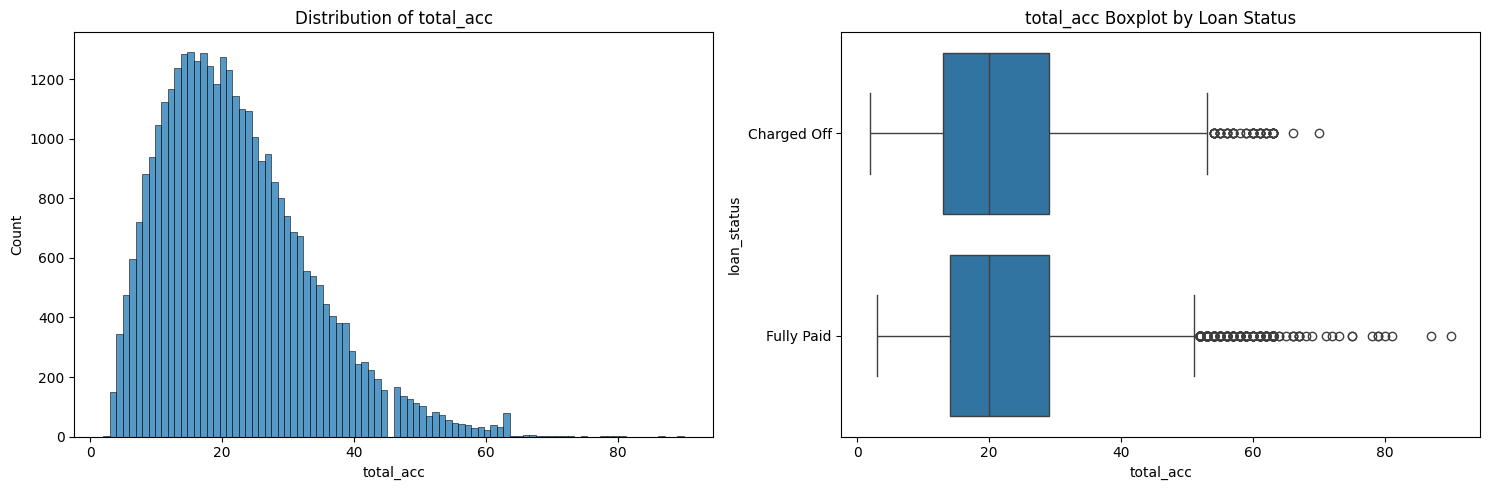

In [156]:
plt.figure(figsize=(15,5))

plot_distribution(final_dataset, 'total_acc')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

---
#### Variable - out_prncp
Data_Dictionary: Remaining outstanding principal for total amount funded.

In [157]:
final_dataset.out_prncp.value_counts()

out_prncp
0.0    34597
Name: count, dtype: int64

In [158]:
final_dataset.groupby('loan_status')['out_prncp'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                             
Charged Off   4858.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fully Paid   29739.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Observation:**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [159]:
final_dataset = final_dataset.drop('out_prncp',axis=1)

---
#### Variable - out_prncp_inv
Data_Dictionary: Remaining outstanding principal for portion of total amount funded by investors

In [160]:
final_dataset.out_prncp_inv.value_counts()

out_prncp_inv
0.0    34597
Name: count, dtype: int64

In [161]:
final_dataset.groupby('loan_status')['out_prncp_inv'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                             
Charged Off   4858.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fully Paid   29739.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Observation:**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ignored for analysis. Therefore out_prncp_inv variable can be removed or dropped.

In [162]:
final_dataset = final_dataset.drop('out_prncp_inv',axis=1)

#### Variable - total_pymnt
Data_Dictionary: Payments received to date for total amount funded.

In [163]:
final_dataset.total_pymnt.describe()

count    34597.000000
mean     11894.392156
std       8715.509427
min         33.730000
25%       5571.230000
50%       9771.780000
75%      16113.960000
max      58563.680000
Name: total_pymnt, dtype: float64

In [164]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_dataset = final_dataset[np.abs(final_dataset.total_pymnt-final_dataset.total_pymnt.mean()) <= (3*final_dataset.total_pymnt.std())]

In [165]:
final_dataset['total_pymnt'] = final_dataset['total_pymnt'].apply(lambda x : np.log(x))

<Figure size 1500x500 with 0 Axes>

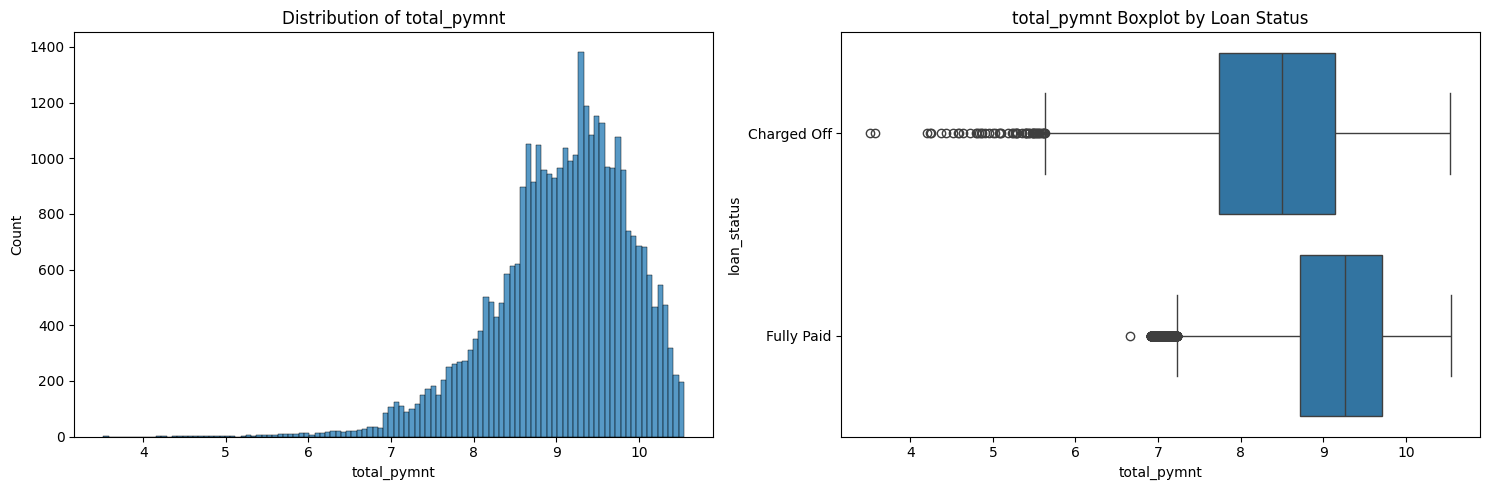

In [166]:
plt.figure(figsize=(15,5))
plot_distribution(final_dataset, 'total_pymnt')
plt.show()

**Observation:**
-  The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [167]:
final_dataset = final_dataset.drop('total_pymnt',axis=1)

---
#### Variable - total_pymnt_inv
Data_Dictionary: Payments received to date for portion of total amount funded by investors.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We can drop this variable from analysis.

In [168]:
final_dataset = final_dataset.drop('total_pymnt_inv',axis=1)

---
#### Variable - total_rec_prncp
Data_Dictionary: Principal received to date

**Observation:**
-  This variable may not be available at the time of loan funding. we can remove this variable from analysis.

In [169]:
final_dataset = final_dataset.drop('total_rec_prncp',axis=1)

---
#### Variable - total_rec_int
Data_Dictionary: Interest received to date.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We may drop this variable from analysis.

In [170]:
final_dataset = final_dataset.drop('total_rec_int',axis=1)

---
#### Variable - total_rec_late_fee
Data_Dictionary: Late fees received to date.

**Observation:**
-  The distribution of late fee is very insignificant to this analysis. we can drop this variable.
-  This variable may not be avaialble at the time of loan funding.

In [171]:
final_dataset = final_dataset.drop('total_rec_late_fee',axis=1)

---
#### Variable - recoveries
Data_Dictionary: post charge off gross recovery.

**Observation:**
-  Recoveries is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [172]:
final_dataset = final_dataset.drop('recoveries',axis=1)

---
#### Variable - collection_recovery_fee
Data_Dictionary: post charge off collection fee.

**Observation:**
-  collection_recovery_fee is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [173]:
final_dataset = final_dataset.drop('collection_recovery_fee',axis=1)

---
#### Variable - last_pymnt_d
Data_Dictionary: Last month payment was received.

In [182]:
final_dataset['last_pymnt_d'] = pd.to_datetime(final_dataset['last_pymnt_d'])
final_dataset.last_pymnt_d.value_counts().head()

last_pymnt_d
2013-03-01    940
2014-12-01    846
2013-05-01    828
2013-02-01    795
2012-03-01    781
Name: count, dtype: int64

In [183]:
final_dataset['last_pymnt_d_month']= final_dataset['last_pymnt_d'].dt.month
final_dataset['last_pymnt_d_year']= final_dataset['last_pymnt_d'].dt.year

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\1531732233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset['last_pymnt_d_year'])


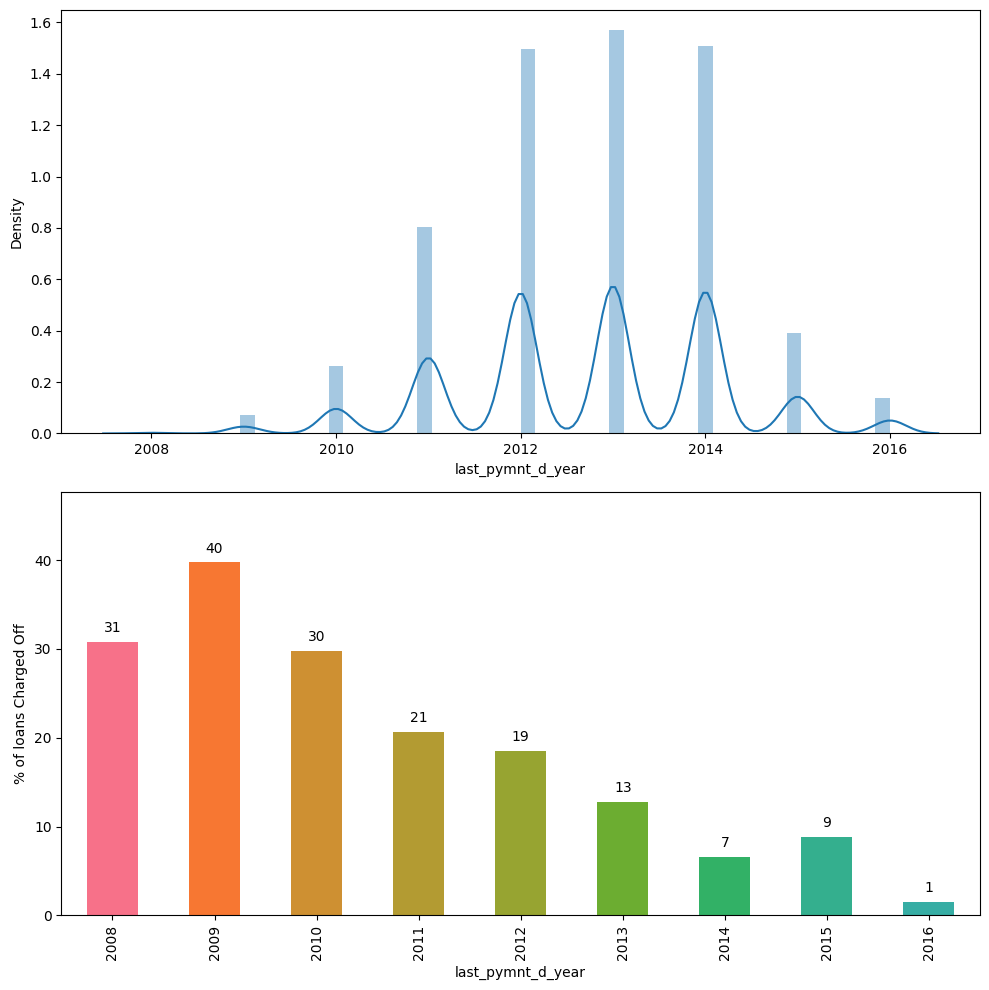

In [184]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(final_dataset['last_pymnt_d_year'])


plt.subplot(2, 1, 2)
plot_loan_status(final_dataset, 'last_pymnt_d_year')
plt.show()


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis. 
- This variable does not affect analysis and will be ignored. 

---
#### Variable - last_pymnt_amnt
Data_Dictionary: Last total payment amount received.

In [185]:
final_dataset.last_pymnt_amnt.describe()

count    34074.000000
mean      2646.650918
std       4216.047508
min          0.010000
25%        220.370000
50%        570.625000
75%       3436.620000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [186]:
final_dataset['last_pymnt_amnt_log'] = final_dataset['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1500x500 with 0 Axes>

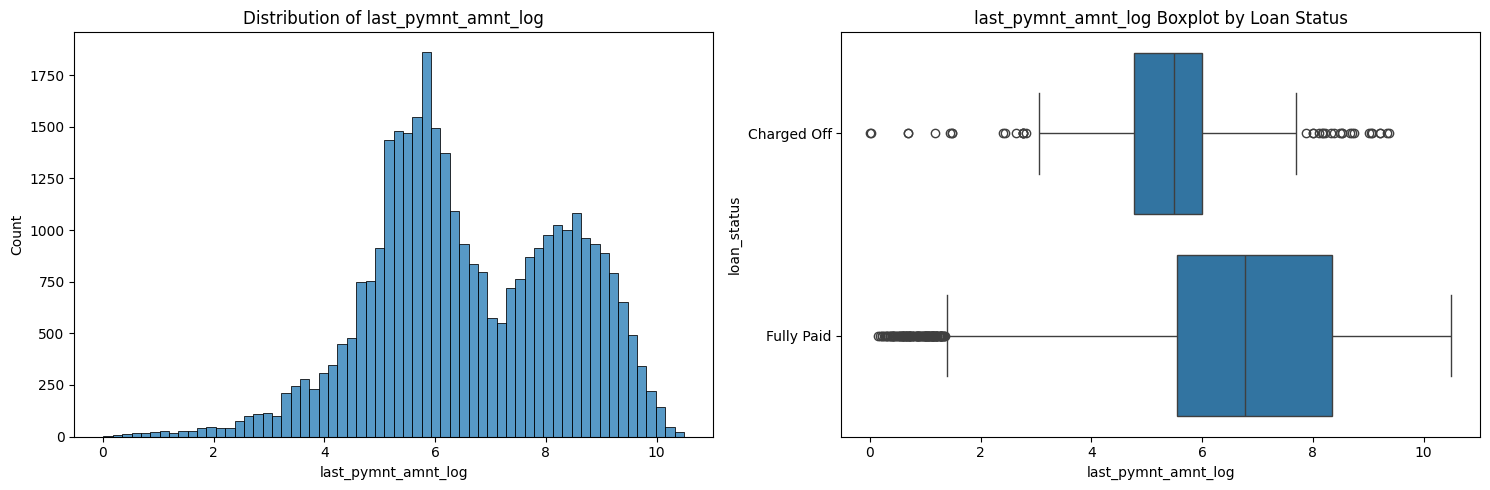

In [187]:
plt.figure(figsize=(15,5))

plot_distribution(final_dataset, 'last_pymnt_amnt_log')
plt.show()

**Observation:**
-  The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans 

---
#### Variable - last_credit_pull_d
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [192]:
final_dataset['last_credit_pull_d'] = pd.to_datetime(final_dataset['last_credit_pull_d'])

final_dataset.last_credit_pull_d.value_counts().head()

last_credit_pull_d
2013-03-01    940
2014-12-01    846
2013-05-01    828
2013-02-01    795
2012-03-01    781
Name: count, dtype: int64

In [193]:
final_dataset['last_credit_pull_d_month']= final_dataset['last_credit_pull_d'].dt.month
final_dataset['last_credit_pull_d_year']= final_dataset['last_credit_pull_d'].dt.year

In [194]:
final_dataset.last_credit_pull_d_year.value_counts(normalize=True)

last_credit_pull_d_year
2013    0.251218
2014    0.241416
2012    0.239332
2011    0.128720
2015    0.062570
2010    0.041938
2016    0.022070
2009    0.011592
2008    0.001145
Name: proportion, dtype: float64

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\680178273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset['last_credit_pull_d_year'])


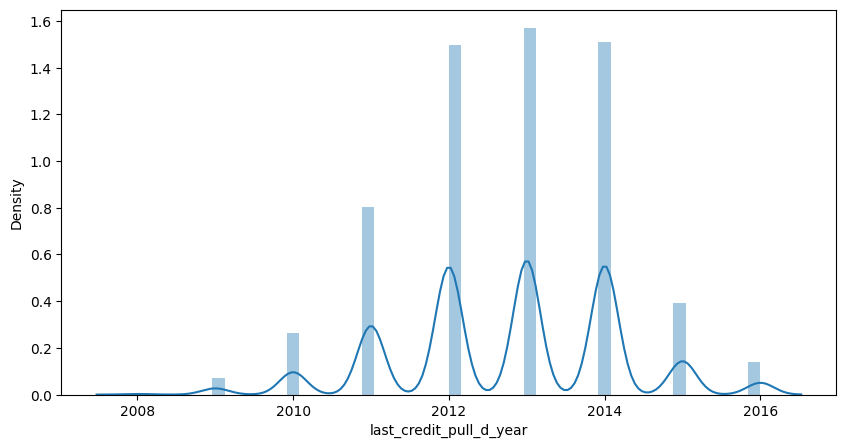

In [195]:
plt.figure(figsize=(10,5))
sns.distplot(final_dataset['last_credit_pull_d_year'])
plt.show()


**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously 
- This variable can be ignored in our analysis. 

--- 
#### Derived variable - ratio of loan amount to annual income 

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\765440404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset['ratio'])


<Axes: xlabel='ratio', ylabel='Density'>

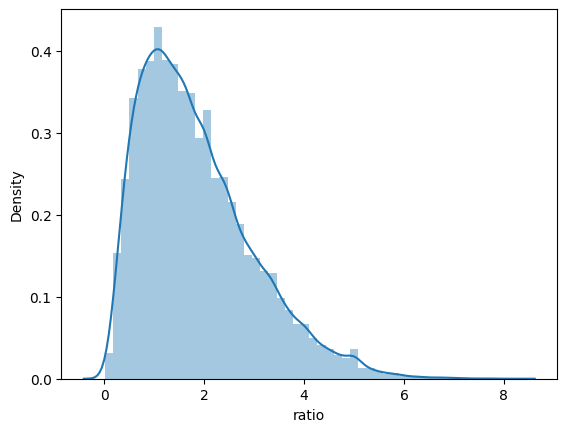

In [196]:
final_dataset['ratio'] = final_dataset['loan_amnt'] * 10 / final_dataset['annual_inc']
sns.distplot(final_dataset['ratio'])

<Axes: xlabel='ratio_bin', ylabel='% of loans Charged Off'>

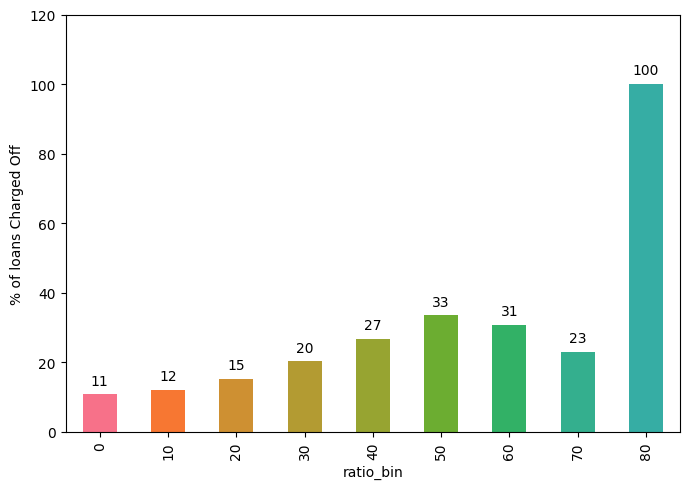

In [197]:
final_dataset['ratio_bin'] = (final_dataset['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_loan_status(final_dataset, 'ratio_bin')

**Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low. 
- <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

### Bivariate Analysis

---
#### loan_amnt over time

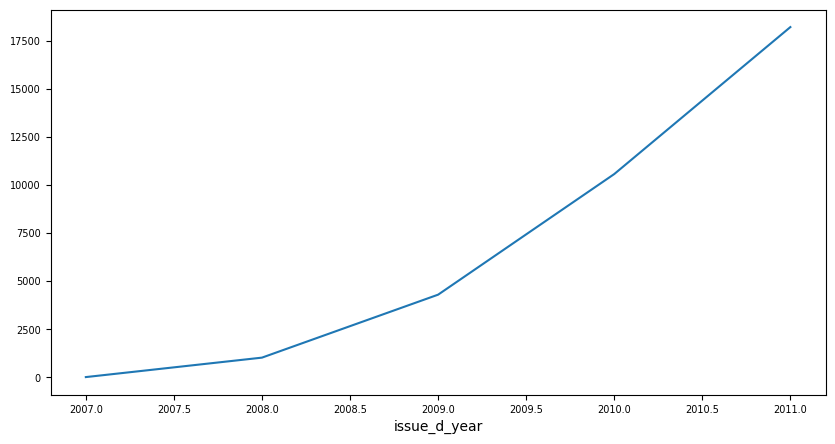

In [198]:
plt.figure(figsize=(10,5))
final_dataset.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

---
#### Avg. loan_amnt over time

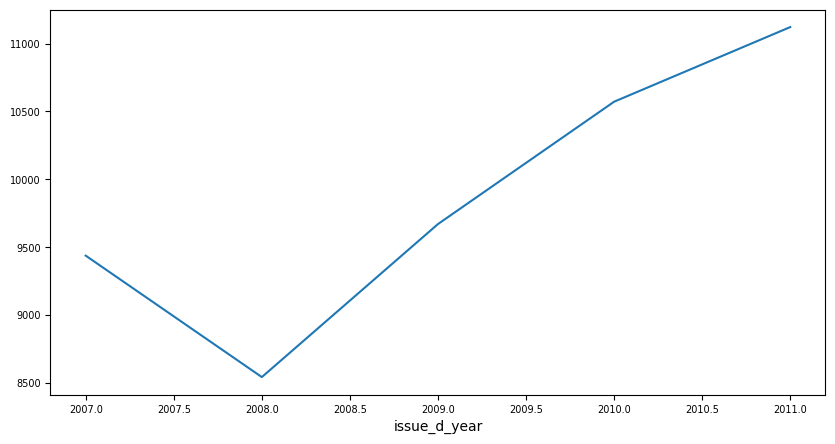

In [199]:
plt.figure(figsize=(10,5))
final_dataset.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation:**
-  Average loan amount dropped sharply when subprime mortgage crisis hit

---
####  loan_amnt and annual_inc

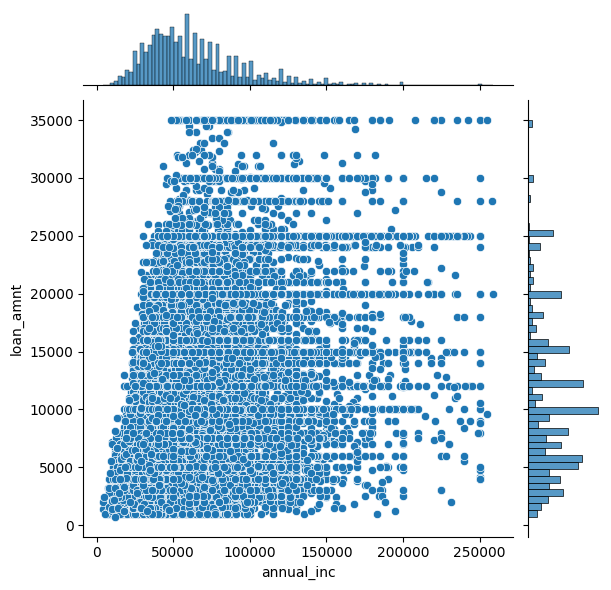

In [202]:
sns.jointplot(data=final_dataset.loc[final_dataset['annual_inc'] < 260000], x='annual_inc', y='loan_amnt')
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade

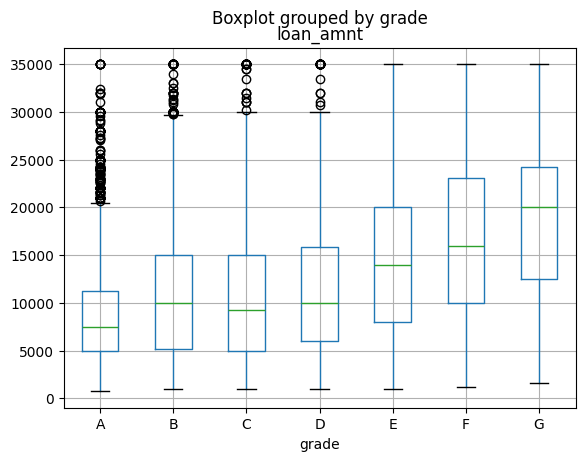

In [203]:
final_dataset.boxplot(column='loan_amnt', by='grade')
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
##### annual income with grade

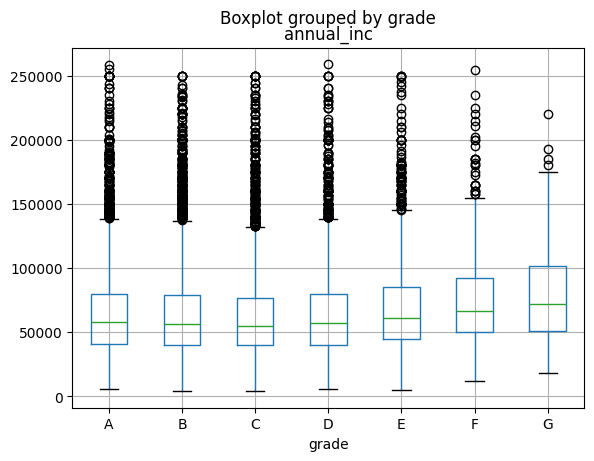

In [204]:
final_dataset.loc[final_dataset['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

---
#### loan_amnt vs verification_status vs loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

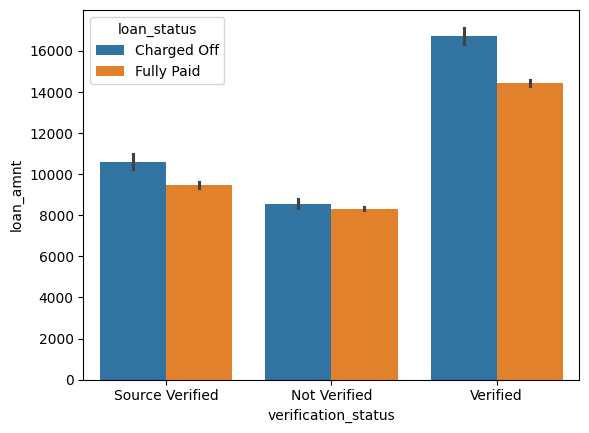

In [205]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=final_dataset, estimator=np.mean)

**Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- <mark>This, combined with previous observation, explains why verfied loans see a higher rate of default.</mark> It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

---
#### Interest Rate and Term

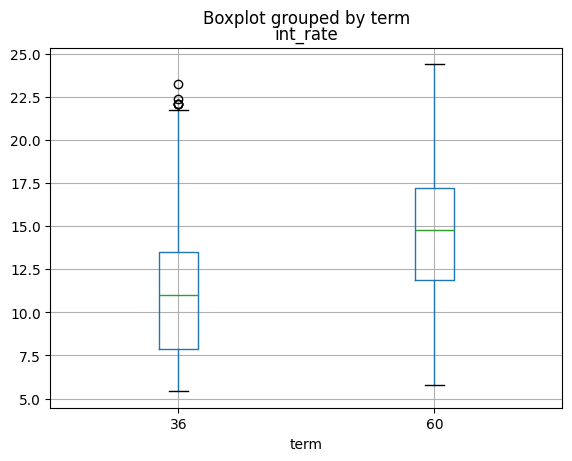

In [206]:
final_dataset.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

---
#### Interest Rate and Sub Grade

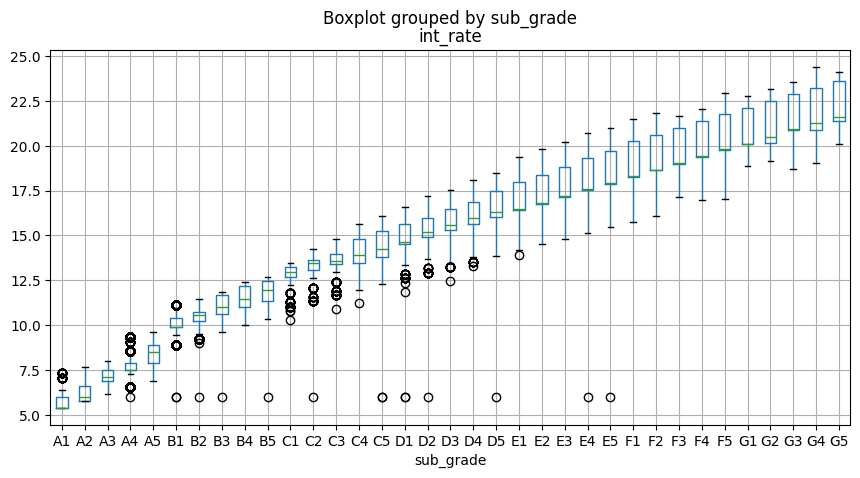

In [207]:
final_dataset.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

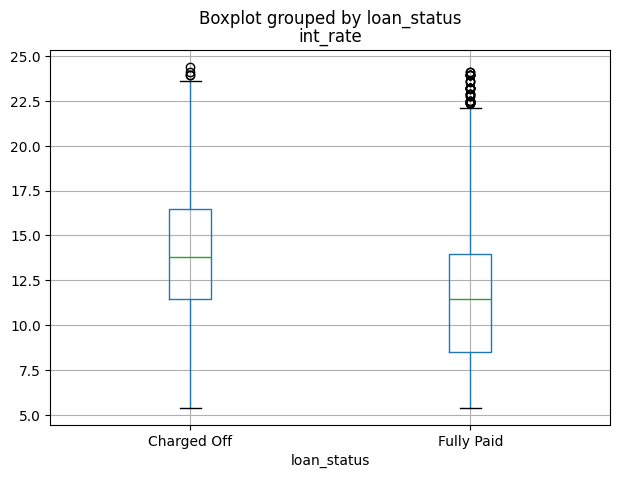

In [208]:
final_dataset.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

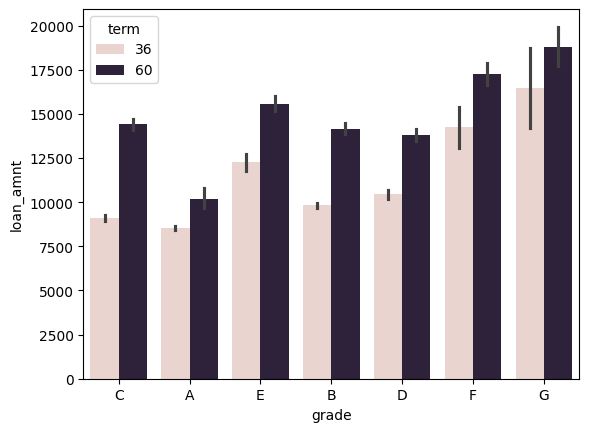

In [209]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


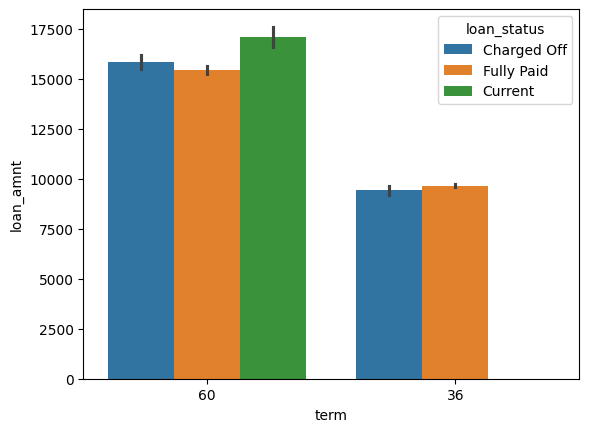

In [210]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_dataset, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### revol_util Vs grade Vs Loan Status


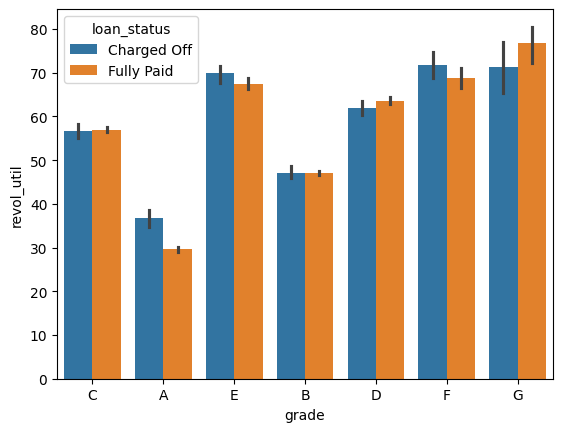

In [211]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
-  revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

#### Loan amount Vs addr_state vs loan Status


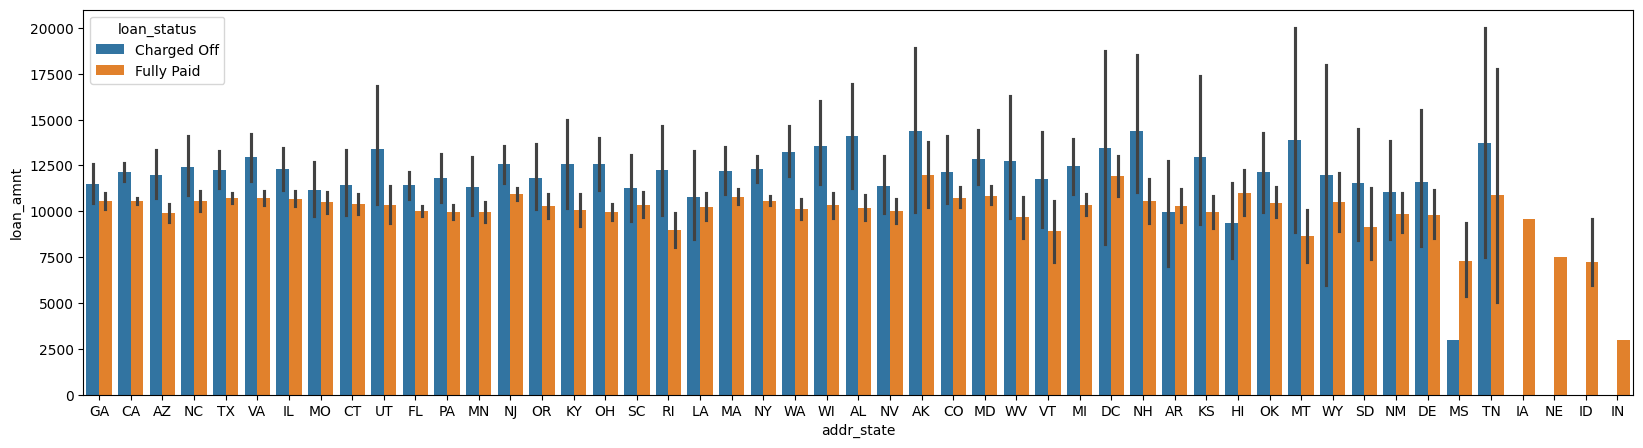

In [212]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
-  States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

#### revol_rate Vs int_rate

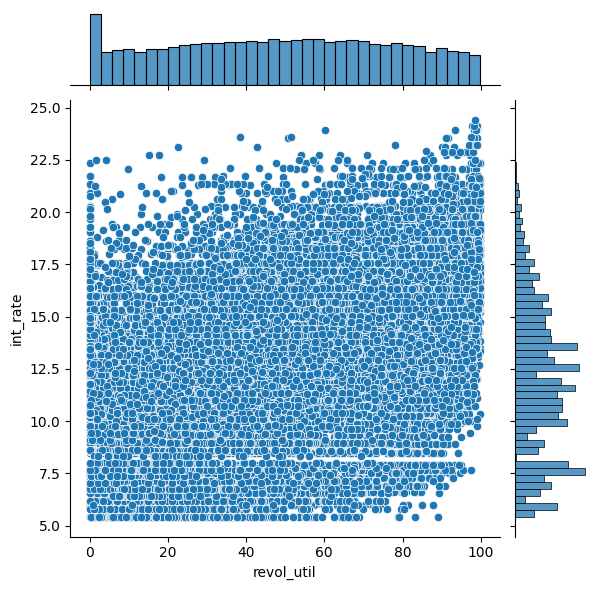

In [214]:
sns.jointplot(data=final_dataset, x='revol_util', y='int_rate')


#### revol_util vs Grade

<Figure size 2000x500 with 0 Axes>

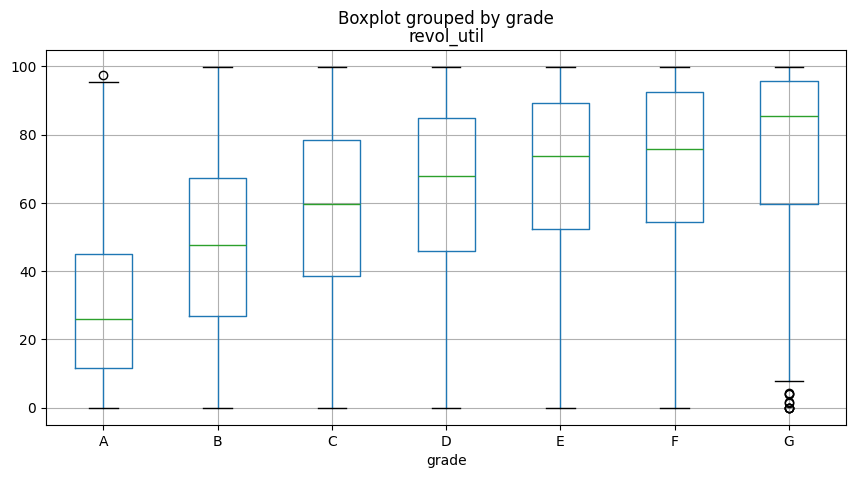

In [215]:
plt.figure(figsize=(20,5))
final_dataset.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [220]:

final_dataset_numeric = final_dataset.apply(pd.to_numeric, errors='coerce')
corr = final_dataset_numeric.corr()

corr['loan_amnt']

loan_amnt                   1.000000
term                        0.326830
int_rate                    0.267460
installment                 0.924973
grade                            NaN
sub_grade                        NaN
emp_title                  -0.910991
emp_length                  0.139453
home_ownership                   NaN
annual_inc                  0.227570
verification_status              NaN
issue_d                          NaN
loan_status                      NaN
purpose                          NaN
addr_state                       NaN
dti                         0.063434
delinq_2yrs                -0.040534
earliest_cr_line                 NaN
inq_last_6mths              0.010051
open_acc                    0.166074
pub_rec                    -0.040321
revol_bal                   0.349543
revol_util                  0.061901
total_acc                   0.244417
last_pymnt_d                0.065491
last_pymnt_amnt             0.441570
last_credit_pull_d          0.065491
p

<Axes: >

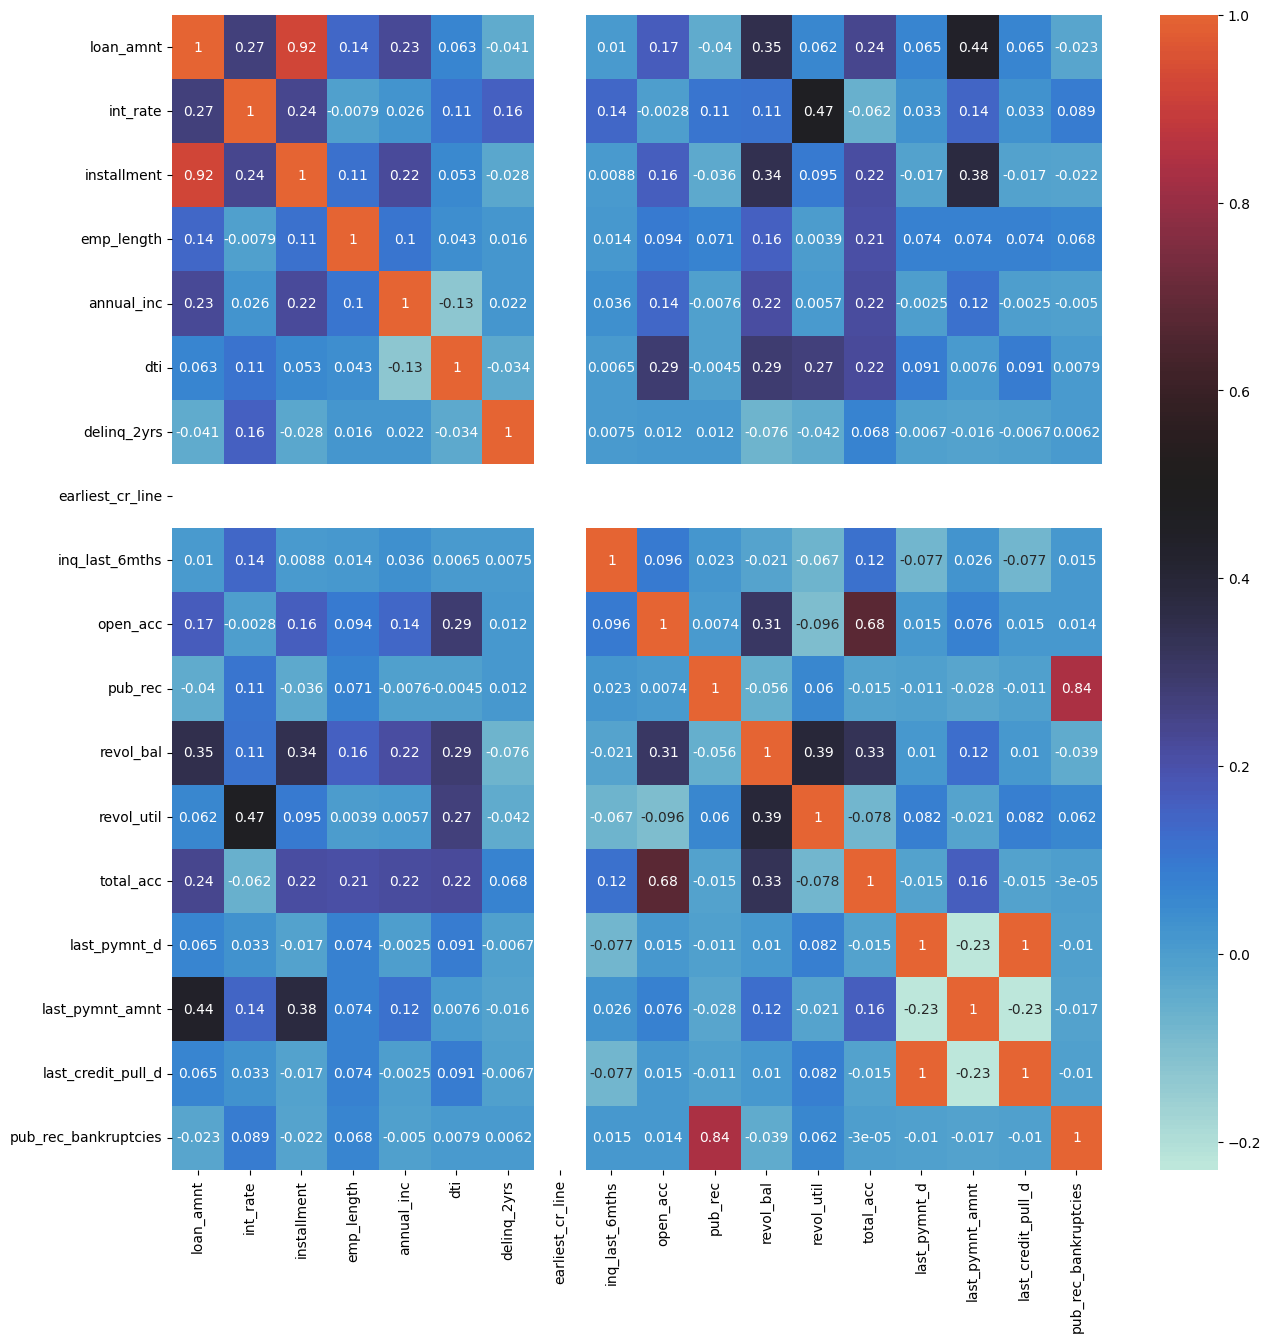

In [222]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = final_dataset_numeric[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- <mark>loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.</mark>
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

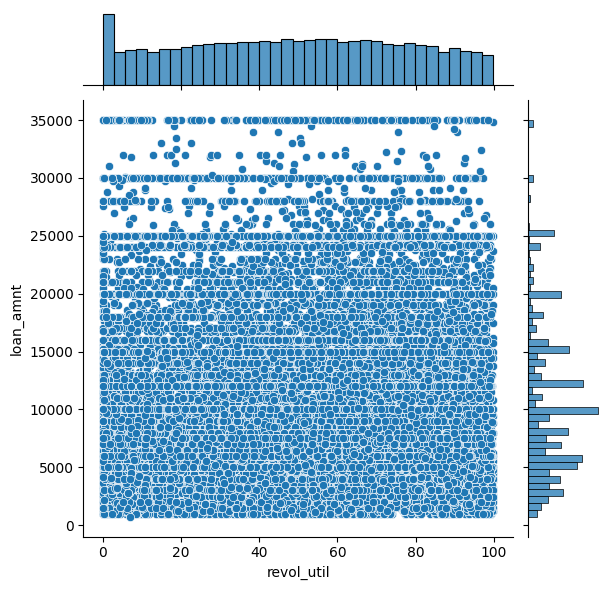

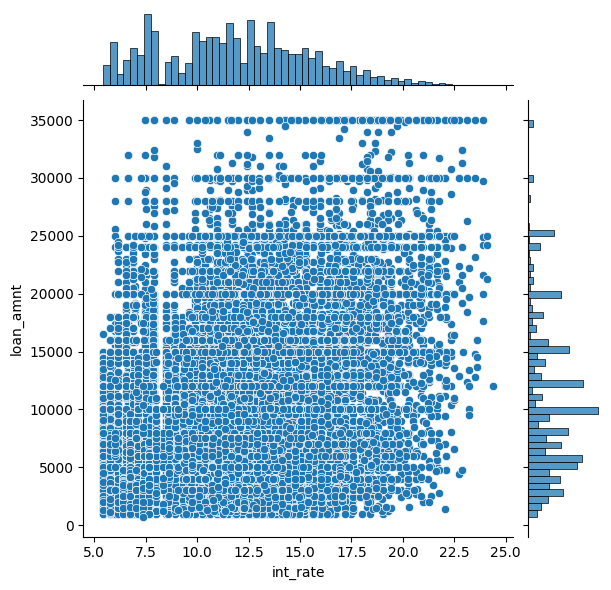

In [224]:
# Plot jointplot for 'revol_util' and 'loan_amnt'
sns.jointplot(data=final_dataset, x='revol_util', y='loan_amnt', kind='scatter')
plt.show()

# Plot jointplot for 'int_rate' and 'loan_amnt'
sns.jointplot(data=final_dataset, x='int_rate', y='loan_amnt', kind='scatter')
plt.show()

####  dti vs open_acc

In [225]:
final_dataset['dti_bin']
final_dataset.groupby('dti_bin').int_rate.mean()

C:\Users\kusha\AppData\Local\Temp\ipykernel_32236\1522891448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_dataset.groupby('dti_bin').int_rate.mean()


dti_bin
0-5      11.052034
5-10     11.529209
10-15    11.972936
15-20    12.308956
20-25    12.565350
25-30     9.505806
Name: int_rate, dtype: float64

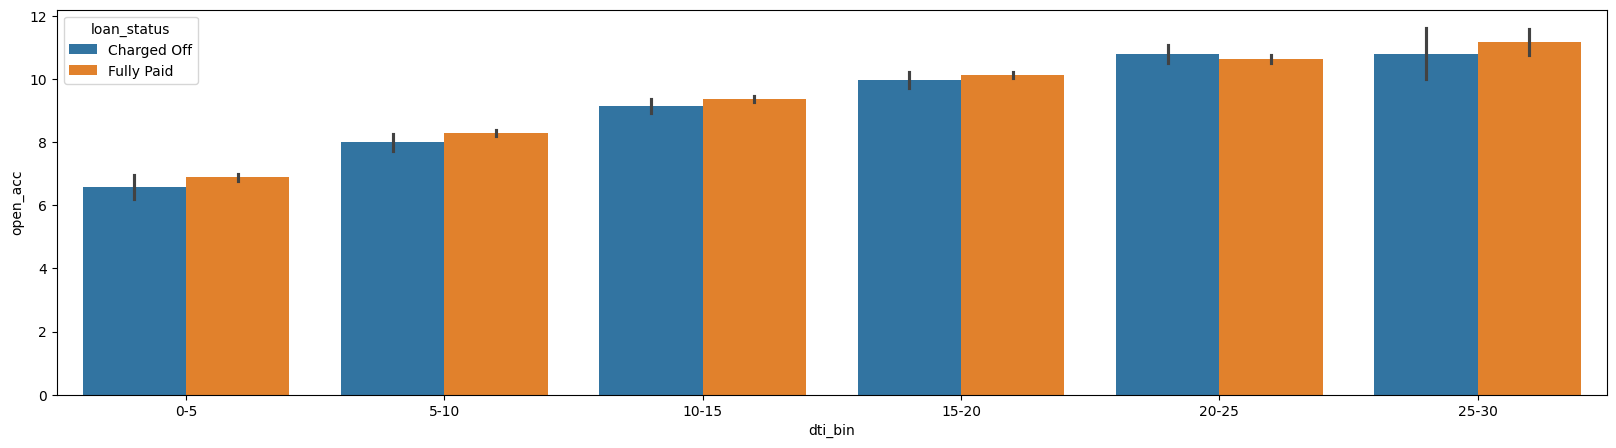

In [226]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

####  delinq_2yr VS loan amount VS grade

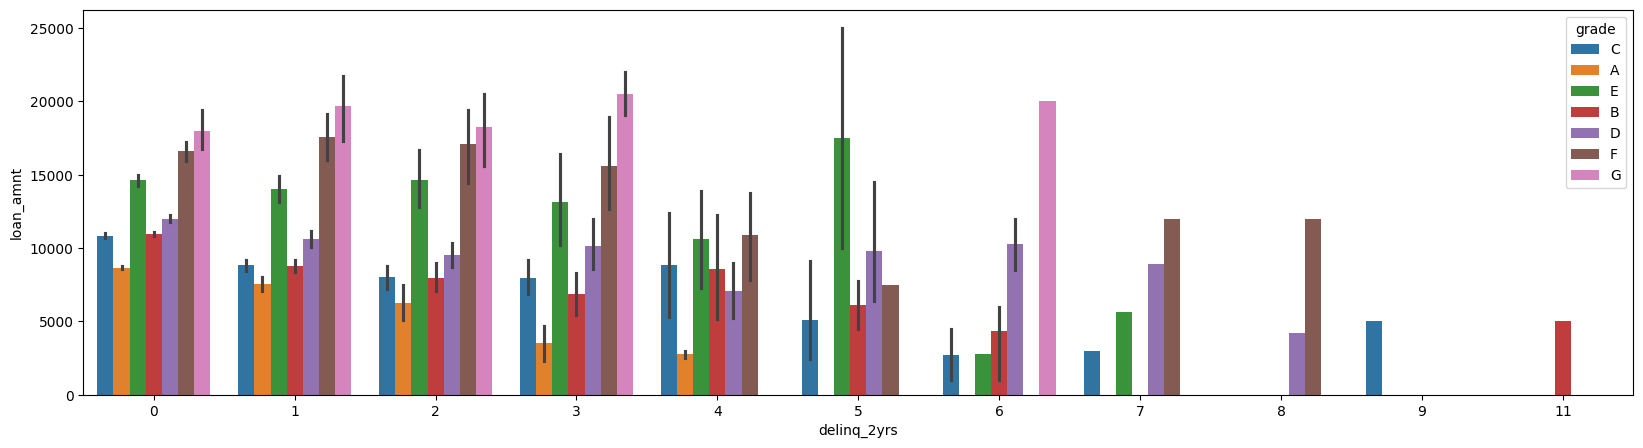

In [227]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
- Loans with a higher number of delinquencies (>3) receive less investment. Despite lower loan amount requests, these loans are deemed risky and receive less investment.
- Lending Club should consider further restricting investment in such loans. On average, loan amounts exceeding 15,000 are observed for individuals with two or more delinquencies. 


####  delinq_2yr VS int_rate  VS loan_status

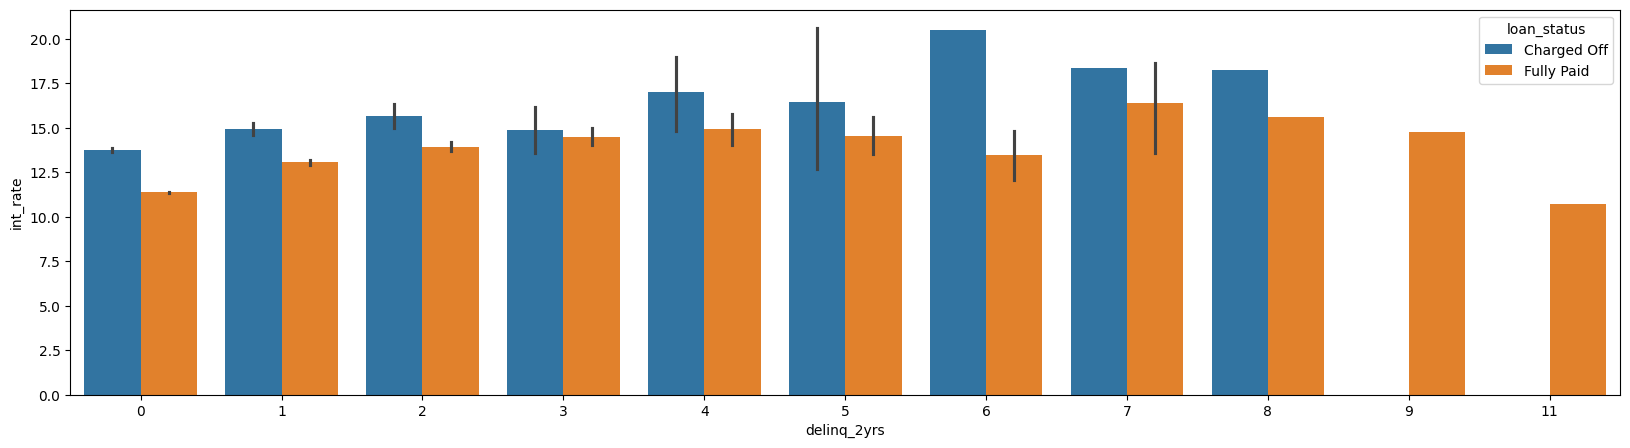

In [229]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=final_dataset, estimator=np.mean)
plt.show()

**Observation:**
- In genral, intrest rate offered inceases with the number of deliquency of the borrower.

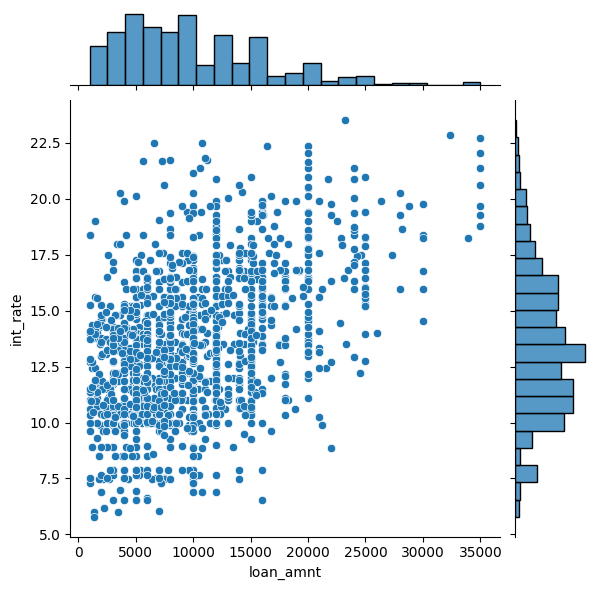

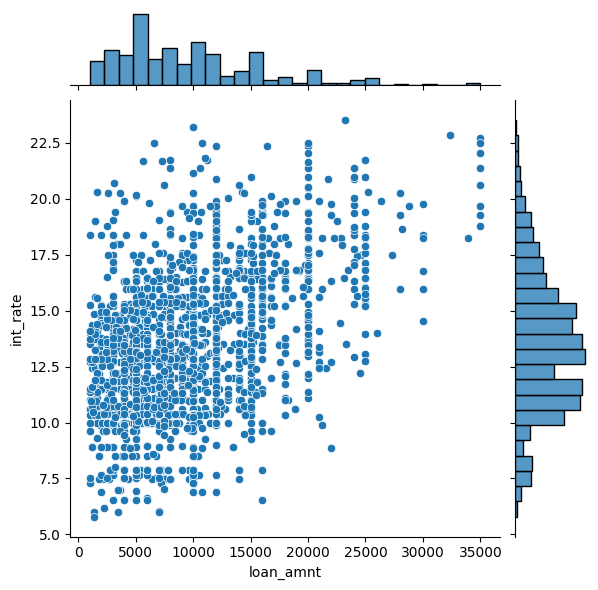

In [231]:
# Plot jointplot for 'loan_amnt' and 'int_rate' with pub_rec_bankruptcies > 0
sns.jointplot(data=final_dataset.loc[final_dataset['pub_rec_bankruptcies'] > 0], x='loan_amnt', y='int_rate', kind='scatter')
plt.show()

# Plot jointplot for 'loan_amnt' and 'int_rate' with pub_rec > 0
sns.jointplot(data=final_dataset.loc[final_dataset['pub_rec'] > 0], x='loan_amnt', y='int_rate', kind='scatter')
plt.show()

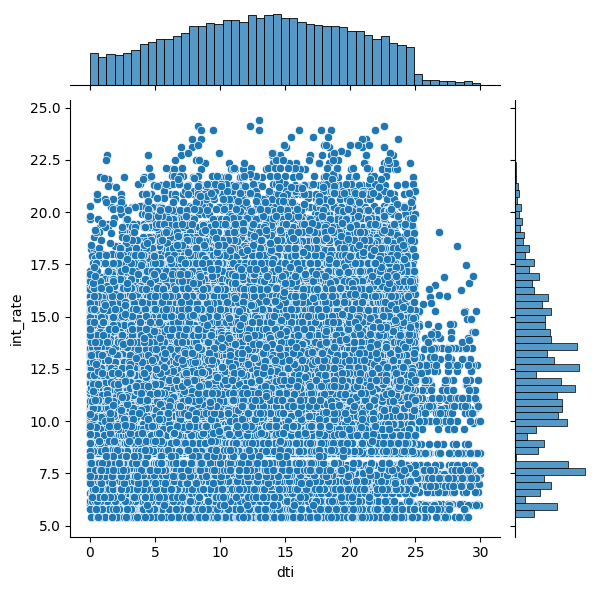

In [234]:
final_dataset_numeric[['pub_rec', 'pub_rec_bankruptcies']].corr()
# Plot jointplot for 'dti' and 'int_rate'
sns.jointplot(data=final_dataset, x='dti', y='int_rate', kind='scatter')
plt.show()